<center><p float="center">
  <img src="https://upload.wikimedia.org/wikipedia/commons/e/e9/4_RGB_McCombs_School_Brand_Branded.png" width="300" height="100"/>
  <img src="https://mma.prnewswire.com/media/1458111/Great_Learning_Logo.jpg?p=facebook" width="200" height="100"/>
</p></center>

<center><font size=10>Artificial Intelligence and Machine Learning</font></center>
<center><font size=6>Featurization, Model Selection and Tuning </font></center>
<center><font size=6>Credit Card Users Churn Prediction</font></center>

## Project Description


**Context**

The Thera bank recently saw a steep decline in the number of users of their credit card, credit cards are a good source of income for banks because of different kinds of fees charged by the banks like annual fees, balance transfer fees, and cash advance fees, late payment fees, foreign transaction fees, and others. Some fees are charged to every user irrespective of usage, while others are charged under specified circumstances.

**Objective**

Customers’ leaving credit card services would lead the bank to loss, so the bank wants to analyze the data of customers and identify the customers who will leave their credit card services and the reason for same – so that the bank could improve upon those areas.

The goal is to explore the data provided, identify patterns, and come up with a classification model to identify customers likely to churn, and provide actionable insights and recommendations that will help the bank improve its services so that customers do not renounce their credit cards.

## Data Description

* **CLIENTNUM**: Client number. Unique identifier for the customer holding the account

* **Attrition_Flag**: Internal event (customer activity) variable - if the account is closed then "Attrited Customer" else "Existing Customer"

* **Customer_Age**: Age in Years Gender: The gender of the account holder

* **Dependent_count**: Number of dependents
* **Education_Level**: Educational Qualification of the account holder - Graduate, High School, Unknown, Uneducated, College(refers to a college student), Post-Graduate, Doctorate.

* **Marital_Status**: Marital Status of the account holder

* **Income_Category**: Annual Income Category of the account holder

* **Card_Category**: Type of Card

* **Months_on_book**: Period of relationship with the bank

* **Total_Relationship_Count**: Total no. of products held by the customer

* **Months_Inactive_12_mon**: No. of months inactive in the last 12 months

* **Contacts_Count_12_mon**: No. of Contacts between the customer and bank in the last 12 months Credit_Limit: Credit Limit on the Credit Card

* **Total_Revolving_Bal**: The balance that carries over from one month to the next is the revolving balance

* **Avg_Open_To_Buy**: Open to Buy refers to the amount left on the credit card to use (Average of last 12 months)

* **Total_Trans_Amt**: Total Transaction Amount (Last 12 months)

* **Total_Trans_Ct**: Total Transaction Count (Last 12 months)

* **Total_Ct_Chng_Q4_Q1**: Ratio of the total transaction count in 4th quarter and the total transaction count in the 1st quarter

* **Total_Amt_Chng_Q4_Q1**: Ratio of the total transaction amount in 4th quarter and the total transaction amount in the 1st quarter

* **Avg_Utilization_Ratio**: Represents how much of the available credit the customer spent

## Data Load and Overview

### Import required libraries

In [1]:
 # Data load , manipulation and visualizations
import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

# model selection
from sklearn.model_selection import(
    train_test_split,
    StratifiedKFold,
    cross_val_score,
    GridSearchCV,
    RandomizedSearchCV
)

# Data preprocessing
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import (
    StandardScaler,
    MinMaxScaler,
    LabelEncoder,
    OrdinalEncoder,
    OneHotEncoder
)

# Oversample and undersample
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

# Model building
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (
    BaggingClassifier,
    RandomForestClassifier,
    AdaBoostClassifier,
    GradientBoostingClassifier
)
from xgboost import XGBClassifier


# Model performance and metrics
from sklearn import metrics
from sklearn.metrics import(
    accuracy_score,
    recall_score,
    precision_score,
    f1_score,
    roc_auc_score,
    confusion_matrix,
    ConfusionMatrixDisplay
)

# pipeline framework
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.compose import ColumnTransformer

### Configure section

In [2]:
# path to the data set
path = '/content/drive/MyDrive/FeaturizationModelTuning/BankChurners.csv'

# To define maximum number of columns to be displayed in a dataframe
pd.set_option("display.max_columns", None)

# To supress scientific notations for a dataframe
pd.set_option("display.float_format", lambda x: "%.2f" % x)

# plot default size for visualization
plt.rcParams['figure.figsize'] = (10,5)

# set the sns style
sns.set_style("white")

### Load dataset

In [3]:
# import the colab libraries
from google.colab import drive
drive.mount('/content/drive')

# read csv file to a data frame
df = pd.read_csv(path)

# backup the data
BC_data = df.copy()

Mounted at /content/drive


### Data overview

In [4]:
# analyze first few rows
df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.00,777,11914.00,1.33,1144,42,1.62,0.06
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.00,864,7392.00,1.54,1291,33,3.71,0.10
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.00,0,3418.00,2.59,1887,20,2.33,0.00
3,769911858,Existing Customer,40,F,4,High School,NaN,Less than $40K,Blue,34,3,4,1,3313.00,2517,796.00,1.41,1171,20,2.33,0.76
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.00,0,4716.00,2.17,816,28,2.50,0.00


In [5]:
# analyze last rows
df.tail()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
10122,772366833,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,40,3,2,3,4003.00,1851,2152.00,0.70,15476,117,0.86,0.46
10123,710638233,Attrited Customer,41,M,2,NaN,Divorced,$40K - $60K,Blue,25,4,2,3,4277.00,2186,2091.00,0.80,8764,69,0.68,0.51
10124,716506083,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,5,3,4,5409.00,0,5409.00,0.82,10291,60,0.82,0.00
10125,717406983,Attrited Customer,30,M,2,Graduate,NaN,$40K - $60K,Blue,36,4,3,3,5281.00,0,5281.00,0.54,8395,62,0.72,0.00
10126,714337233,Attrited Customer,43,F,2,Graduate,Married,Less than $40K,Silver,25,6,2,4,10388.00,1961,8427.00,0.70,10294,61,0.65,0.19


In [6]:
# analyze random rows
df.sample(5)

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
5598,719286708,Existing Customer,50,F,1,Graduate,Single,Less than $40K,Blue,39,4,5,2,2434.00,1340,1094.00,0.67,4498,76,0.81,0.55
6643,719620983,Existing Customer,41,F,2,NaN,Single,Less than $40K,Blue,29,6,3,0,2701.00,1839,862.00,0.77,4406,80,0.78,0.68
4939,708879483,Existing Customer,48,F,1,College,Divorced,Less than $40K,Blue,36,6,3,0,4006.00,1646,2360.00,0.75,5006,89,0.53,0.41
4059,780336258,Existing Customer,55,F,1,Graduate,Single,Less than $40K,Blue,42,6,3,2,2517.00,1257,1260.00,0.83,4528,75,0.79,0.50
4870,719464758,Existing Customer,52,F,1,College,Single,Less than $40K,Blue,43,5,2,3,1438.30,604,834.30,0.81,4219,83,0.69,0.42


**Observations**:

* There are some null or missing values
* Income category has unexpected value - abc

In [7]:
# check the dataset size
df.shape

(10127, 21)

**Observations**:

* There are 10127 rows and 21 columns

In [8]:
# check the data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           8608 non-null   object 
 6   Marital_Status            9378 non-null   object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

**Observations**:

The following data types are observed in the data set
* int : CLIENTNUM, Customer_Age, Dependent_Count, Months_on_book, Total_Relationship_Count, Months_Inactive_12_mon, Contacts_count_12_mon, Total_Revolving_Bal, Total_Trans_Amt, Total_Trans_ct ( 10 features)

* float : Credit_Limit, Avg_Open_To_Buy, Total_Amt_Chng_Q4_Q1, Total_Ct_Chng_Q4_Q1, Avg_Utilization_Ratio ( 5 features)

* object : Attrition_Flag, Gender, EducationLevel, Marital_Status, Income_Category, Card_Category ( 6 features)

* The features are imported with correct data types.

* There are some missing values in the features - EducationLevel, Marital_Status

* The size of the dataset is about 1.6 MB

In [9]:
# convert object data type to category
for feature in df.select_dtypes(include='object').columns.to_list():
  df[feature] = df[feature].astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   CLIENTNUM                 10127 non-null  int64   
 1   Attrition_Flag            10127 non-null  category
 2   Customer_Age              10127 non-null  int64   
 3   Gender                    10127 non-null  category
 4   Dependent_count           10127 non-null  int64   
 5   Education_Level           8608 non-null   category
 6   Marital_Status            9378 non-null   category
 7   Income_Category           10127 non-null  category
 8   Card_Category             10127 non-null  category
 9   Months_on_book            10127 non-null  int64   
 10  Total_Relationship_Count  10127 non-null  int64   
 11  Months_Inactive_12_mon    10127 non-null  int64   
 12  Contacts_Count_12_mon     10127 non-null  int64   
 13  Credit_Limit              10127 non-null  floa

In [10]:
# describe the numerical fields
df.describe(include='number').T

,count,mean,std,min,25%,50%,75%,max
CLIENTNUM,10127.00,739177606.33,36903783.45,708082083.00,713036770.50,717926358.00,773143533.00,828343083.00
Customer_Age,10127.00,46.33,8.02,26.00,41.00,46.00,52.00,73.00
Dependent_count,10127.00,2.35,1.30,0.00,1.00,2.00,3.00,5.00
Months_on_book,10127.00,35.93,7.99,13.00,31.00,36.00,40.00,56.00
Total_Relationship_Count,10127.00,3.81,1.55,1.00,3.00,4.00,5.00,6.00
Months_Inactive_12_mon,10127.00,2.34,1.01,0.00,2.00,2.00,3.00,6.00
Contacts_Count_12_mon,10127.00,2.46,1.11,0.00,2.00,2.00,3.00,6.00
Credit_Limit,10127.00,8631.95,9088.78,1438.30,2555.00,4549.00,11067.50,34516.00
Total_Revolving_Bal,10127.00,1162.81,814.99,0.00,359.00,1276.00,1784.00,2517.00
Avg_Open_To_Buy,10127.00,7469.14,9090.69,3.00,1324.50,3474.00,9859.00,34516.00


**Observations**:

* The average customer age is 46 years with max as 73 years.
* Most customers have 1 to 3 dependents
* 75% of customers have been with the bank for 40 months or less, meaning newer customers dominate.
* Customers typically have 3 to 5 products with the bank (relationships)
* 50% of customers have 2 to 3 months inactivity that suggests moderate engagement.
* The average contacted coutnt is 2.46 times per year that indicates moderate engagement.
* The average credit limit is 8632\$ but it varies widely
* The average revolving balance is 1162\$ and varies significantly.
* A large spread in Average Open to Buy suggests different spending behaviors among customers.
* The average change in spending from Q1 to Q4 is 0.76 (76%), meaning most customers increased their spending across quarters.
* The average transaction amount is 4404\$, but some customers spend significantly more (max: 18,484\$).
* Most customers complete 45 to 81 transactions per year.
* The average change in transaction count is 0.71 (71%), indicating that customer transaction increased.
* The average utilization ratio is 27% and 75% of customers are utlizing only upto 50% of credit limit.


In [11]:
#describe the categorical fields
df.describe(include='category').T

,count,unique,top,freq
Attrition_Flag,10127,2,Existing Customer,8500
Gender,10127,2,F,5358
Education_Level,8608,6,Graduate,3128
Marital_Status,9378,3,Married,4687
Income_Category,10127,6,Less than $40K,3561
Card_Category,10127,4,Blue,9436


In [12]:
# value counts for categorical columns
for col in df.select_dtypes(include='category').columns:
  print(df[col].value_counts())
  print("\n")
  print(df[col].value_counts(normalize=True))
  print('-'*40)

Attrition_Flag
Existing Customer    8500
Attrited Customer    1627
Name: count, dtype: int64


Attrition_Flag
Existing Customer   0.84
Attrited Customer   0.16
Name: proportion, dtype: float64
----------------------------------------
Gender
F    5358
M    4769
Name: count, dtype: int64


Gender
F   0.53
M   0.47
Name: proportion, dtype: float64
----------------------------------------
Education_Level
Graduate         3128
High School      2013
Uneducated       1487
College          1013
Post-Graduate     516
Doctorate         451
Name: count, dtype: int64


Education_Level
Graduate        0.36
High School     0.23
Uneducated      0.17
College         0.12
Post-Graduate   0.06
Doctorate       0.05
Name: proportion, dtype: float64
----------------------------------------
Marital_Status
Married     4687
Single      3943
Divorced     748
Name: count, dtype: int64


Marital_Status
Married    0.50
Single     0.42
Divorced   0.08
Name: proportion, dtype: float64
------------------------------

**Observations**:

* Approximately 16% of customers have canceled their credit cards.

* A higher number of female customers have used the credit card.

* The majority of customers hold a graduate degree.

* Most customers are married.

* A significant portion of customers belong to the low-income category.

In [13]:
# check for null or missing values
df.isnull().sum()

,0
CLIENTNUM,0
Attrition_Flag,0
Customer_Age,0
Gender,0
Dependent_count,0
Education_Level,1519
Marital_Status,749
Income_Category,0
Card_Category,0
Months_on_book,0


**Observations**:

The columns Education Level and Marital Status contain missing values, which will be addressed during the data preprocessing stage.

In [14]:
# check for duplicate values
df.duplicated().sum()

np.int64(0)

**Observations**:
* There are no duplicate records

## Exploratory Data Analysis

### Univarient Analysis - Numeric fields

In [15]:
# Function to plot box and histogram for a numerical feature
def boxplot_histogram(data, feature, figsize=(15,5), kde=True, bins=None):
  """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (15,5))
    kde: whether to show the density curve (default True)
    bins: number of bins for histogram (default None)
  """
  fig, (axes_box, axes_hist) = plt.subplots(nrows=2, sharex=True, gridspec_kw={"height_ratios" : (0.35,0.65)}, figsize=figsize )

  # box plot
  sns.boxplot(data=data, x=feature, showmeans=True, color="violet", ax=axes_box)

  # histogram
  if bins:
    sns.histplot(data=data, x=feature, ax=axes_hist, kde=kde, bins=bins)
  else:
    sns.histplot(data=data, x=feature, ax=axes_hist, kde=kde)

  # add mean and median in histogram
  axes_hist.axvline(data[feature].mean(), color="green", linestyle='--')
  axes_hist.axvline(data[feature].median(), color="black", linestyle='-')
  plt.show()

#### Customer Age

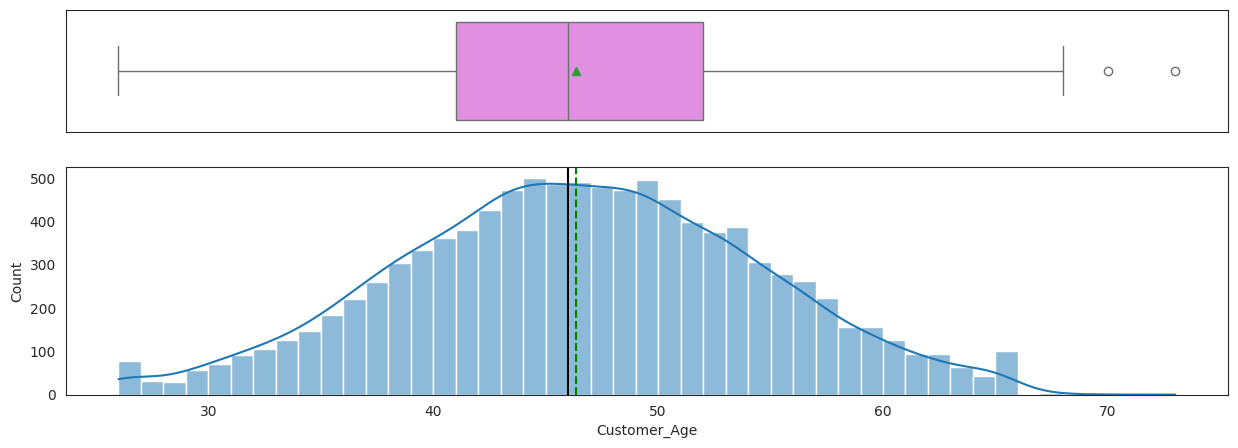

In [16]:
# box and histplot for Customer Age
boxplot_histogram(df, 'Customer_Age')

**Observations**:

* There are two customers aged 70 or above, considered as outliers.

* The distribution of customer age is approximately normal.

#### Months on book

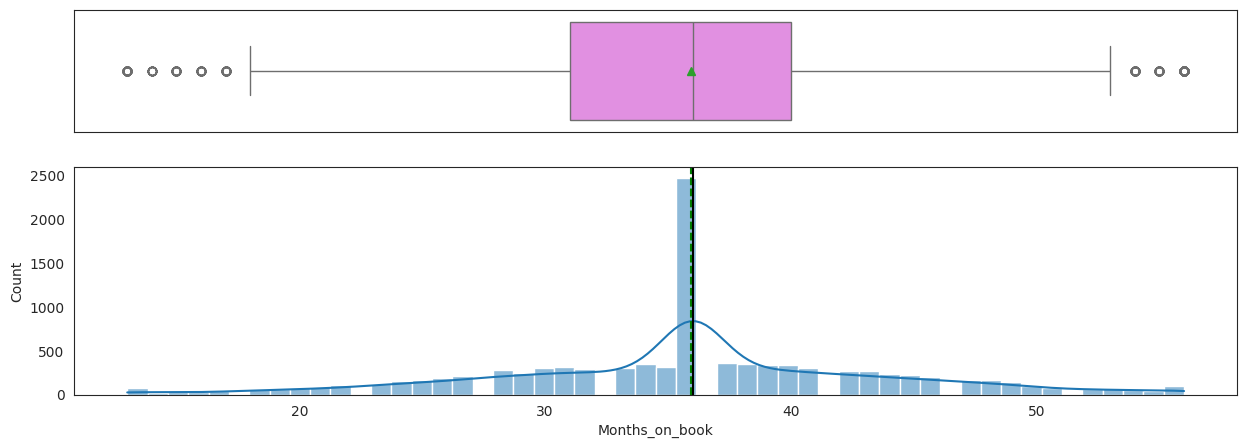

In [17]:
# box and histplot for Months on book
boxplot_histogram(df, 'Months_on_book')

**Observations**:

* Outliers are present at both the lower and upper bounds.

* A significant number of customers have months on book less than 40.

* The distribution is nearly normal

#### Credit Limit

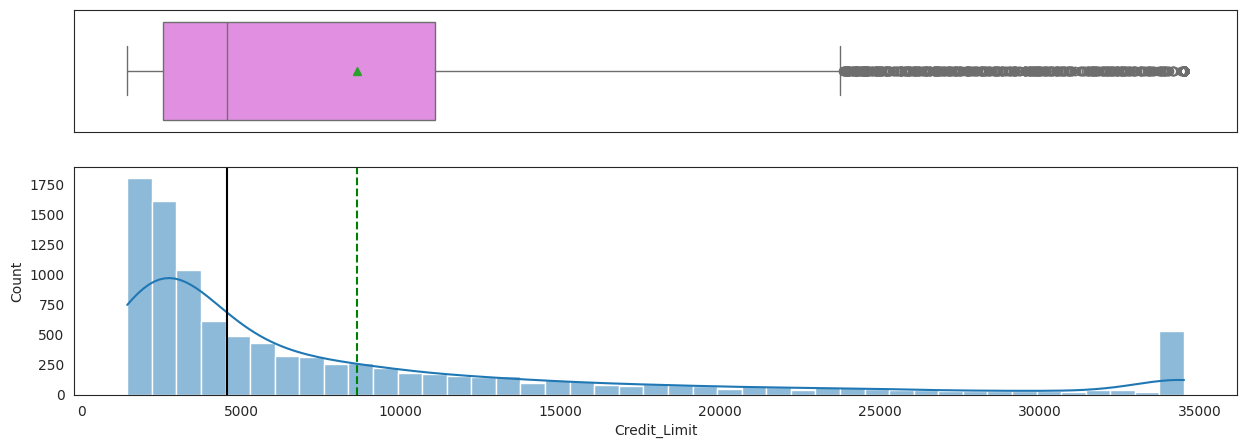

In [18]:
# box and histplot for credit limit
boxplot_histogram(df, 'Credit_Limit')

**Observations**:

* Numerous outliers are present on the upper bound.

* The distribution exhibits a strong right skew.

* A substantial number of customers have high credit limits.

#### Total Revolving Balance

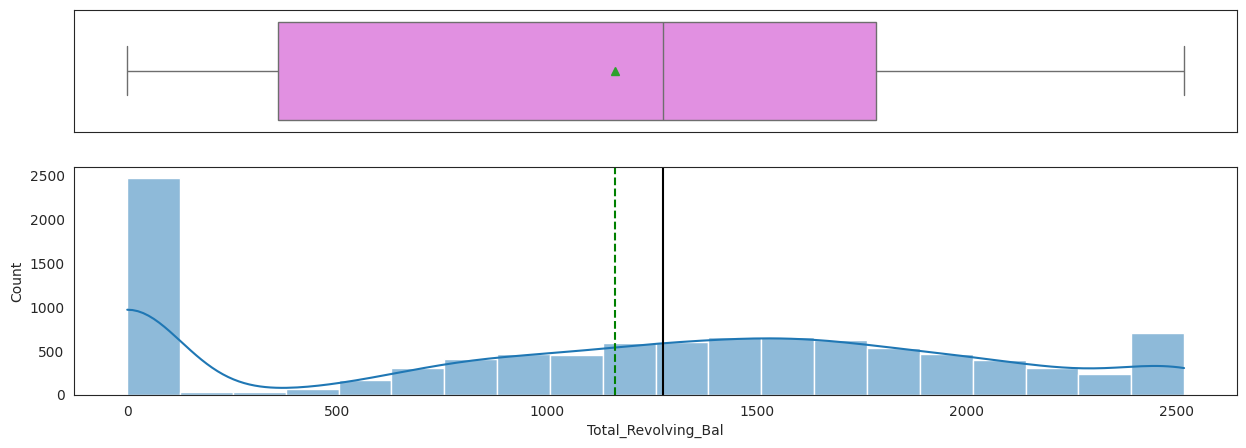

In [19]:
# box and histplot for Total Revolving Balance
boxplot_histogram(df, 'Total_Revolving_Bal')

**Observations**:

* The Total Revolving Balance distribution is left-skewed and has no outliers.

* A zero balance for many customers suggests that they are either not using the credit card or paying their bills on time.

#### Average Open to Buy

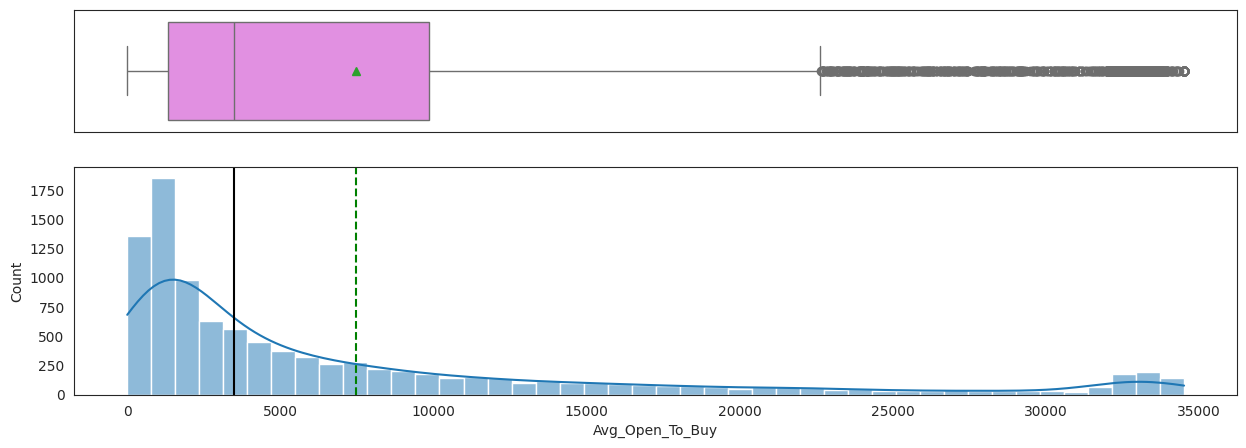

In [20]:
# box and histplot for Avg_Open_To_Buy
boxplot_histogram(df, 'Avg_Open_To_Buy')

**Observations**:

* The distribution of Average to Buy is highly right-skewed with numerous outliers.

* The high variation suggests diverse spending behaviors among customers.

#### Total_Amt_Chng_Q4_Q1

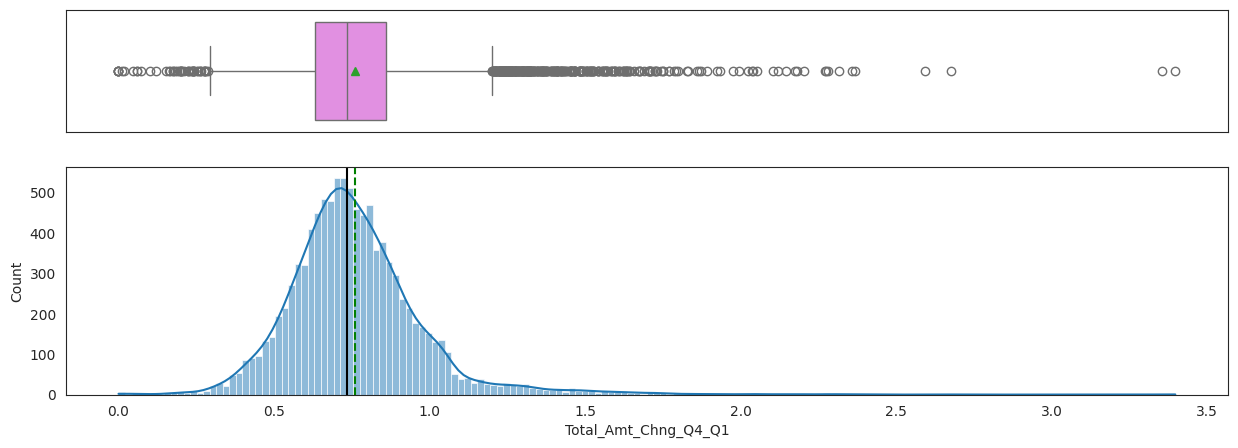

In [21]:
# boxplot and histogram for ratio of Total transaction amount in Q4 to Q1
boxplot_histogram(df,'Total_Amt_Chng_Q4_Q1')

**Observations**:

* There are numerous outliers on either side of the distribution.
* The distribution is slightly right skewed

#### Total_Trans_Ct

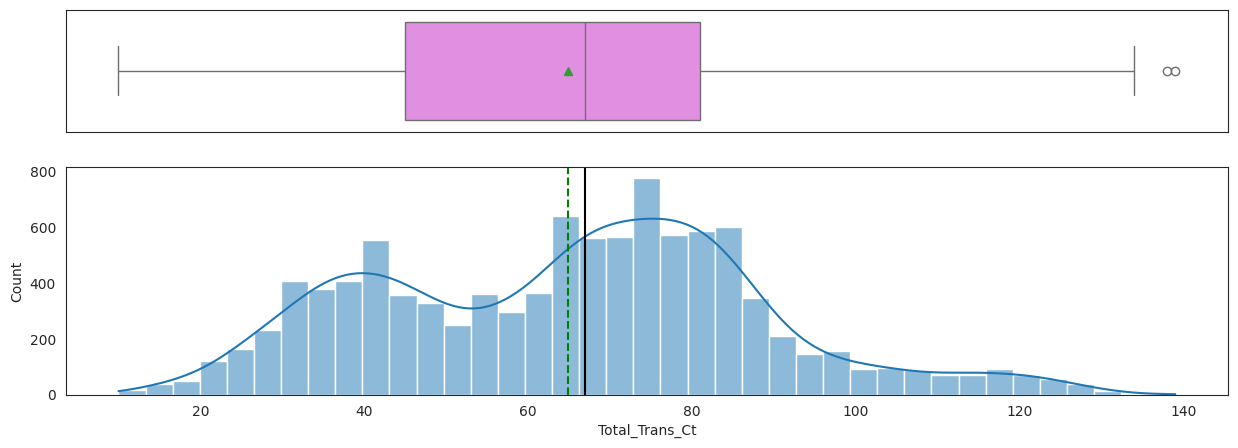

In [22]:
# box plot and histogram for Total Transaction Count
boxplot_histogram(df,'Total_Trans_Ct')

**Observations**:

* The distribution is slightly left-skewed.

* A few outliers are present on the upper bound for transaction count.

#### Total_Trans_Amt

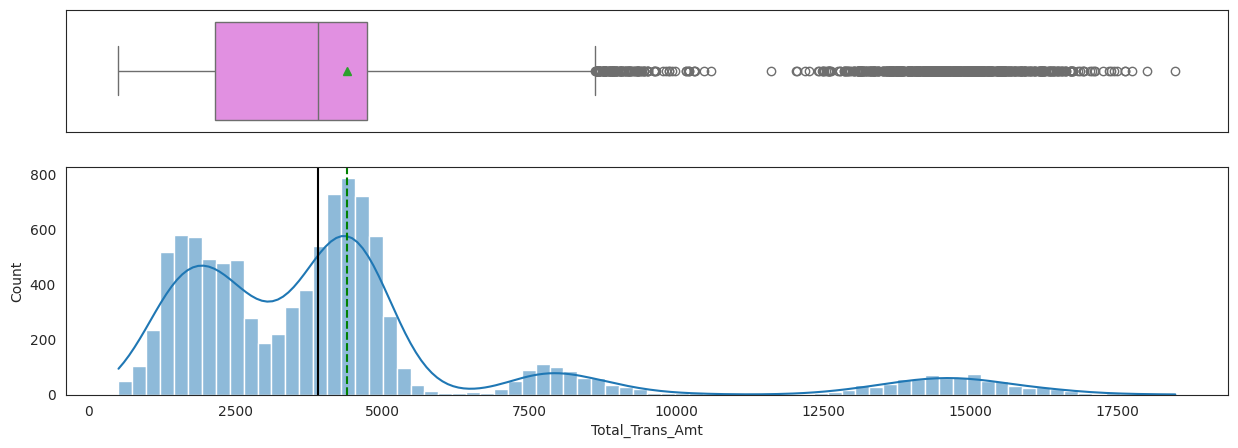

In [23]:
# box plot and histogram for Total Transaction Amount
boxplot_histogram(df,'Total_Trans_Amt')

**Observations**:

* The distribution is right-skewed.
* There are numerous upper-bound outliers in the transaction amount.

#### Total_Ct_Chng_Q4_Q1

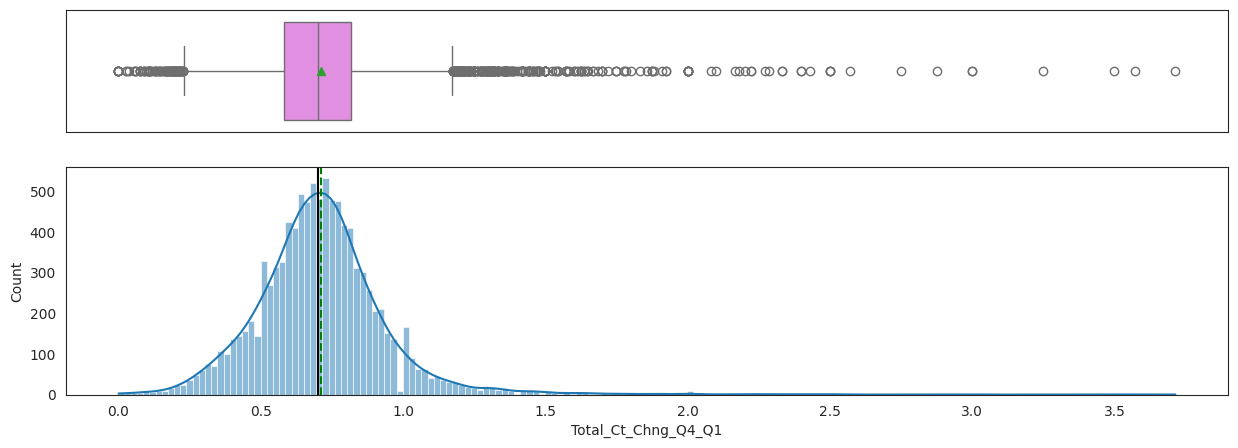

In [24]:
boxplot_histogram(df,'Total_Ct_Chng_Q4_Q1')

**Observations**:

* The transaction count change is normally distributed

* Many outliers are present on either side of the sitribution.

#### Avg_Utilization_Ratio

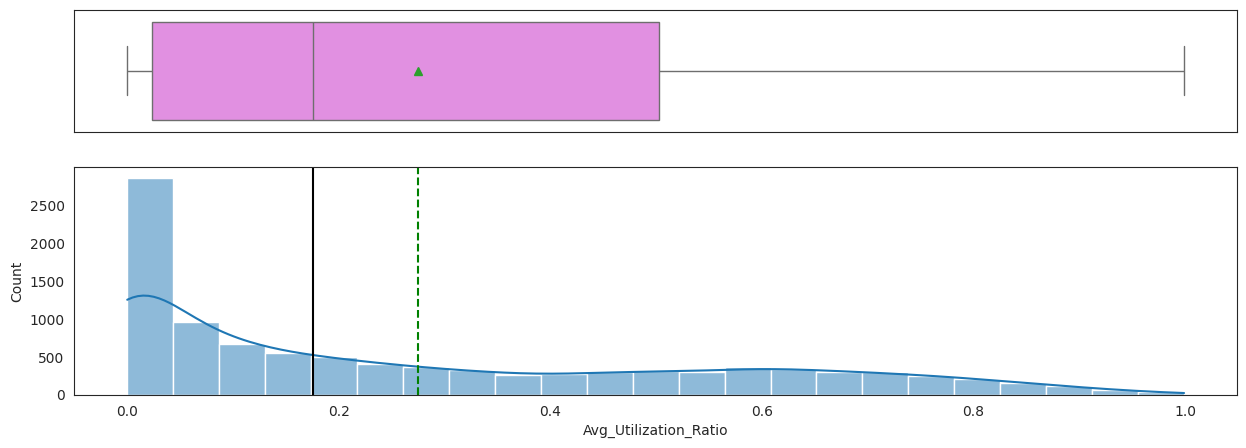

In [25]:
boxplot_histogram(df,'Avg_Utilization_Ratio')

**Observations**:

* Many customers have a low utilization rate.

* A few customers exhibit high utilization.

* The distribution is right-skewed.

### Univarient Analysis - Categorical fields

In [26]:
# Function to plot the countplots with labels
def labelled_barplot(data, features, cols=1, figsize=None, legend = True, bivarient=False):
  rows = (len(features)+ cols -1)//cols
  if figsize is None:
    plt.figure(figsize=(cols*4.5, rows*3.5))
  else:
    plt.figure(figsize=figsize)

  for i,feature in enumerate(features):
    plt.subplot(rows, cols, i+1)

    if bivarient == True:
      hue = 'Attrition_Flag'
    else:
      hue = feature

    ax = sns.countplot(data=data, x=feature, hue=hue, palette='Paired', order = data[feature].value_counts().index)
    for container in ax.containers:
      ax.bar_label(container, fmt='%d', fontsize=10)

    ax.set_title(f'Count plot - {feature}')

    ax.tick_params(axis='x', rotation=90)

    if ax.legend_ and legend == False:
      ax.legend_.remove()

  plt.tight_layout()
  plt.show()

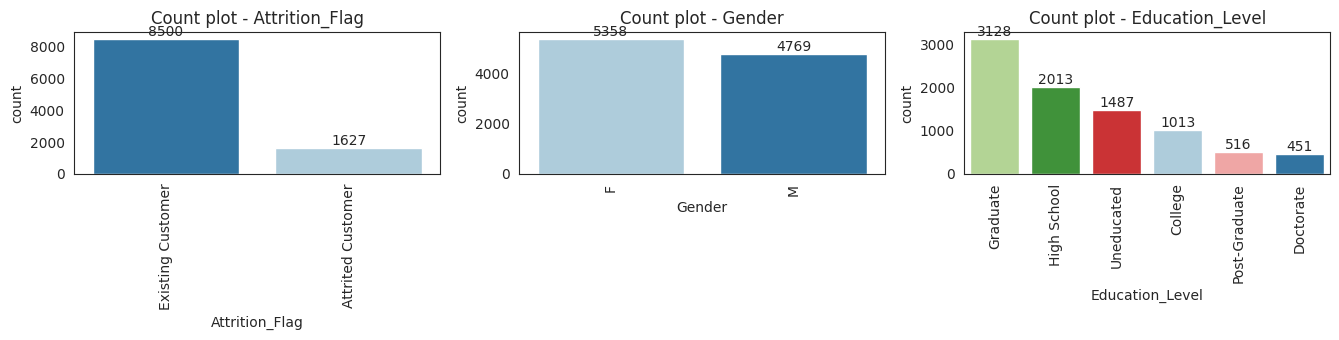

In [27]:
# Attrition Flag, Gender, Education Level
labelled_barplot(df, ['Attrition_Flag','Gender','Education_Level'],cols=3, legend=False)

**Observations**:

* A total of 1,627 customers have stopped using their credit cards, accounting for approximately 16%.

* The number of female customers is higher.

* Graduates and high school students are the primary users of credit cards.

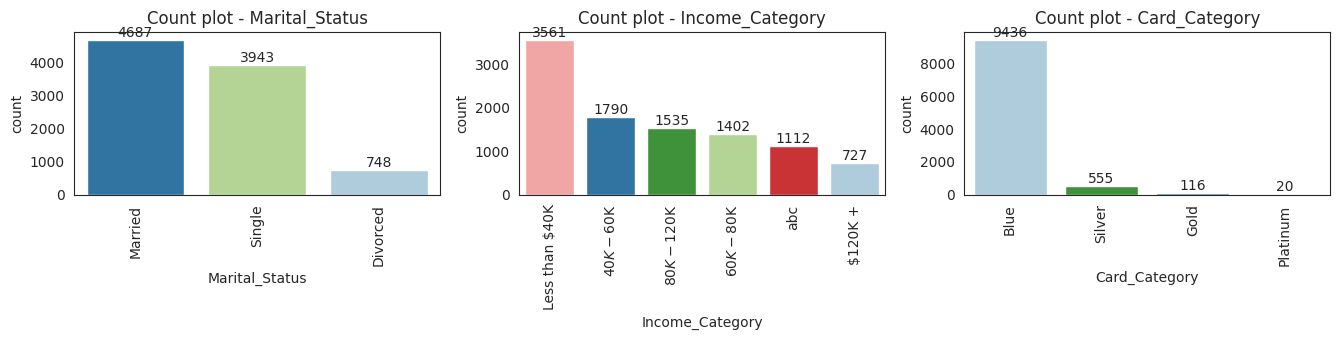

In [28]:
# categorical fields - Marital_Status, Income Category, Card Category
labelled_barplot(df, ['Marital_Status','Income_Category','Card_Category'],cols=3, legend=False)

**Observations**:

* The majority of customers are married.

* Most customers have an income below $40K.

* The income group "abc" likely represents customers with missing income information

* The Blue Card is the most commonly held credit card among customers.

### Bivarient Analysis

#### Heat Map

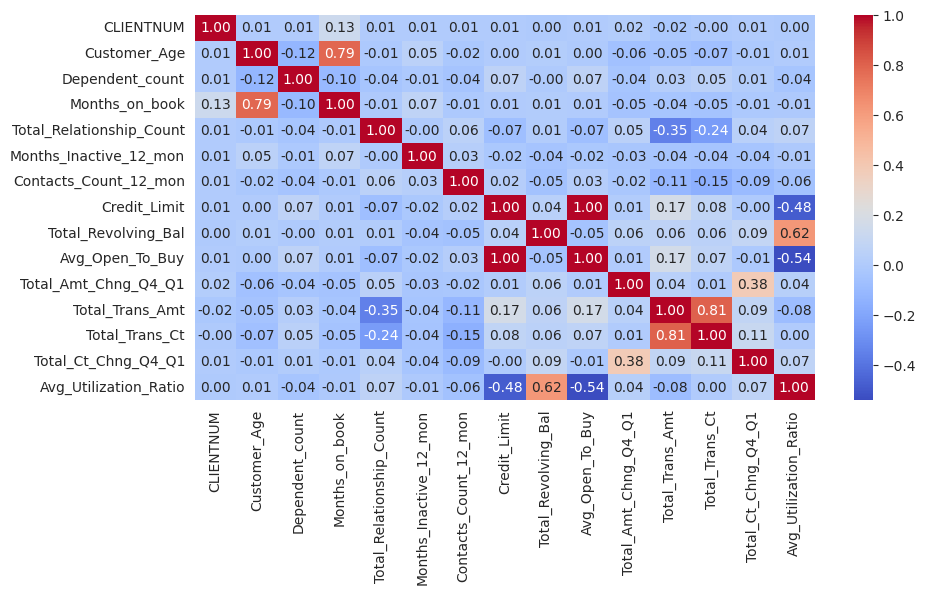

In [29]:
# Heat map for correlations

# create a numerical variable for target variable
df['Attrition_Flag_Nr'] = df['Attrition_Flag'].apply(lambda x : 0 if x == 'Existing Customer' else 1)

sns.heatmap(df.corr(numeric_only=True), cmap='coolwarm', annot=True, fmt="0.2f");

**Observations**:

* Avg Open To Buy is strongly correlated with Credit Limit since it is a derived field.

* An increase in total transaction count leads to a rise in total transaction amount.

* Older customers tend to maintain longer relationships with the bank.

* Avg Utilization Ratio is positively correlated with Total Revolving Balance.

* Avg Utilization Ratio is negatively correlated with Avg Open To Buy.

* Avg Utilization Ratio is negatively correlated with Credit Limit.

* A higher relationship count is negatively correlated with total transaction count and amount.

* Attrition is negatively correlated with Total transaction count and amount.

#### Pair plot

<Figure size 800x800 with 0 Axes>

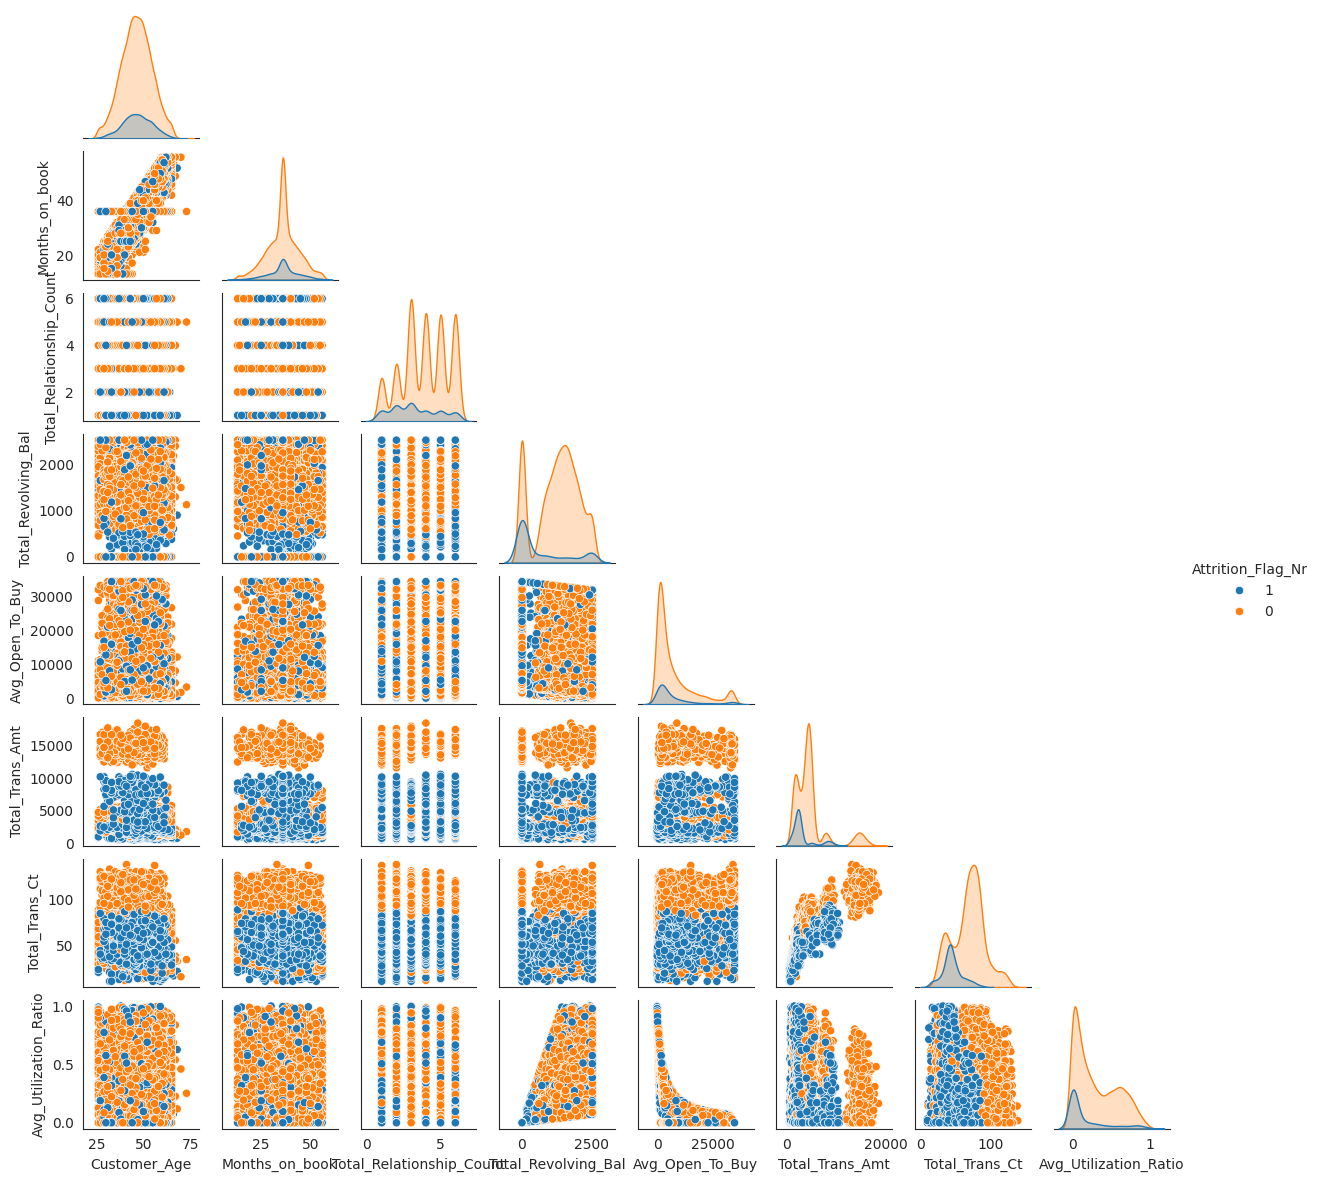

In [30]:
# pair plot to alayze the numerical variables.

# Lets analyze the below fields using pair plot
num_fields_sel = ['Attrition_Flag_Nr','Customer_Age', 'Months_on_book', 'Total_Relationship_Count', 'Total_Revolving_Bal','Avg_Open_To_Buy','Total_Trans_Amt','Total_Trans_Ct', 'Avg_Utilization_Ratio']

plt.figure(figsize=(8,8))
sns.pairplot(df[num_fields_sel], diag_kind='kde', hue='Attrition_Flag_Nr' , corner=True, height=1.5)
plt.show()

**Observations**:

* Customers who discontinued their credit cards have lower total transaction count and amount.

* Total Revolving Balance is relatively low for discontinued customers.

* Avg Open to Buy tends to decrease as Avg Utilization Ratio increases, which is expected.

* Total Revolving Balance increases as Avg Utilization Ratio rises.

* Older customers generally maintain longer relationships with the bank.

* Transaction amount increases as the transaction count rises.

#### Bar plots

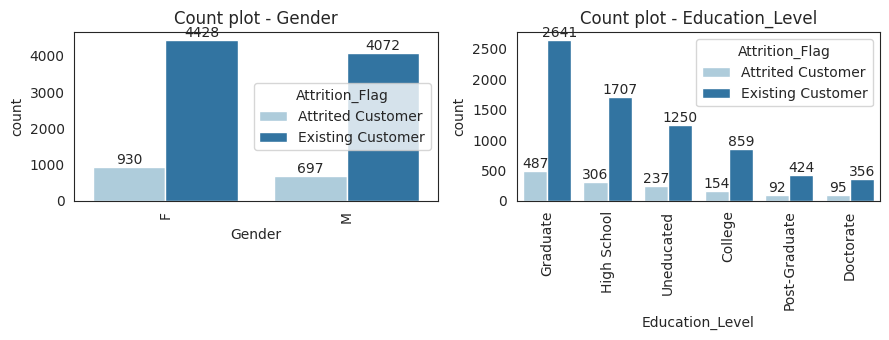

In [31]:
# Attrition Flag, Gender, Education Level
labelled_barplot(df, ['Gender','Education_Level'],cols=2, bivarient=True)

**Observations**:

* Female customers have a higher attrition count.

* Graduates show a higher attrition count compared to other education levels.

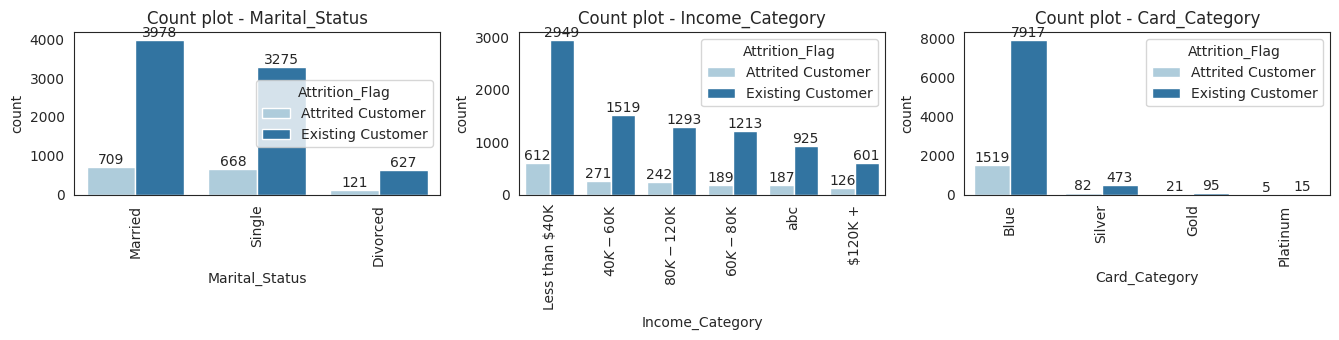

In [32]:
# categorical fields - Marital_Status, Income Category, Card Category
labelled_barplot(df, ['Marital_Status','Income_Category','Card_Category'],cols=3,  bivarient=True)

**Observations**:

* Married customers have a higher attrition count.

* Low-income group customers experience higher attrition than other income groups.

* Blue Card holders have the highest attrition count among all card types.

#### Stacked bar plots

In [33]:
# Function to plot the labelled stack bar
def labelled_stacked_bar(data, feature, target):
  """
  stacked bar plot with labelled percentages

  data: dataframe
  feature: dataframe column
  target : target variable
  """
  count = data[feature].nunique()
  sorter = df[target].value_counts().index[-1]
  ctb = pd.crosstab(df[feature], df[target], margins=True).sort_values(by=sorter, ascending=False)
  print(ctb)
  print('-'*120)

  ctbp = pd.crosstab(df[feature], df[target], normalize='index').sort_values(by=sorter, ascending=False)
  ax = ctbp.plot(kind='bar', stacked=True, figsize = (count+5,4) )
  for container in ax.containers:
    ax.bar_label(container, fmt='%.2f%%', label_type='center')
  plt.legend(loc = 'upper left', bbox_to_anchor=(1,1))
  plt.title(f'{target} - {feature}')
  plt.xticks(rotation=90)
  plt.show()

Attrition_Flag  Attrited Customer  Existing Customer    All
Gender                                                     
All                          1627               8500  10127
F                             930               4428   5358
M                             697               4072   4769
------------------------------------------------------------------------------------------------------------------------


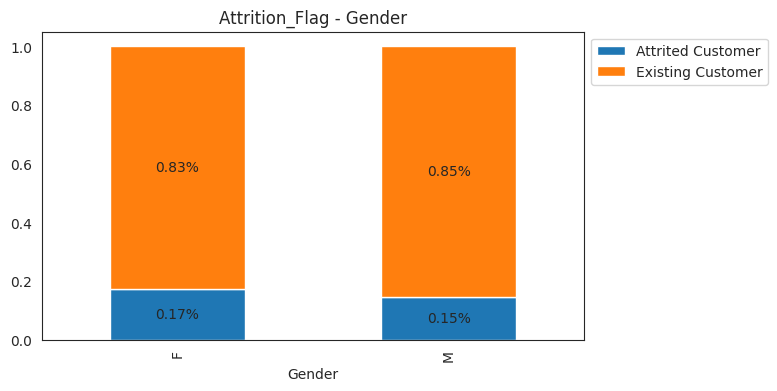

In [34]:
# Gender - Attrition_Flag
labelled_stacked_bar(df, 'Gender','Attrition_Flag')

**Observations**:
* The attrition percentage is higher among female customers.

Attrition_Flag   Attrited Customer  Existing Customer   All
Education_Level                                            
All                           1371               7237  8608
Graduate                       487               2641  3128
High School                    306               1707  2013
Uneducated                     237               1250  1487
College                        154                859  1013
Doctorate                       95                356   451
Post-Graduate                   92                424   516
------------------------------------------------------------------------------------------------------------------------


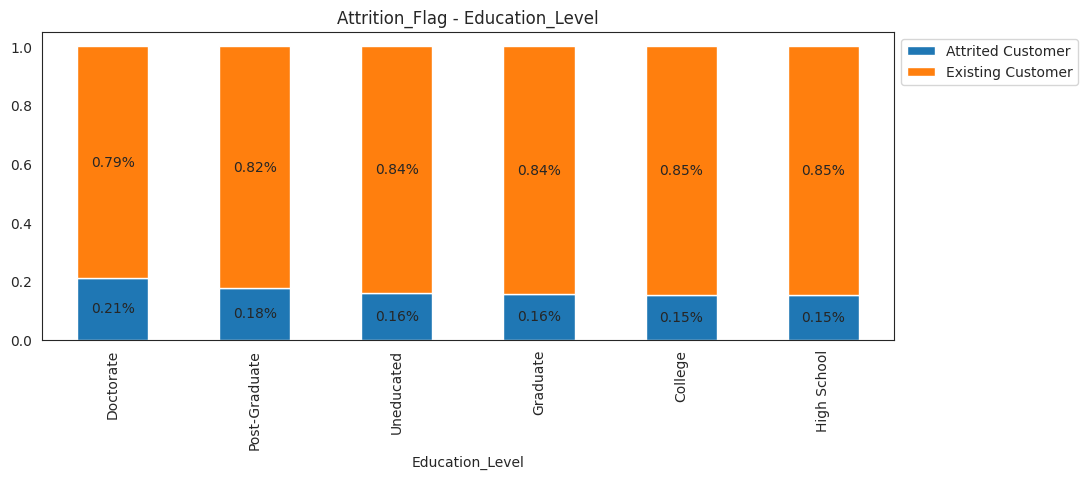

In [35]:
# Education_Level - Attrition_Flag
labelled_stacked_bar(df, 'Education_Level','Attrition_Flag')

**Observations**:

* The Doctorate group has the highest percentage of customers who discontinued credit card usage.

* The College and High School groups have the lowest attrition percentage.

Attrition_Flag  Attrited Customer  Existing Customer   All
Marital_Status                                            
All                          1498               7880  9378
Married                       709               3978  4687
Single                        668               3275  3943
Divorced                      121                627   748
------------------------------------------------------------------------------------------------------------------------


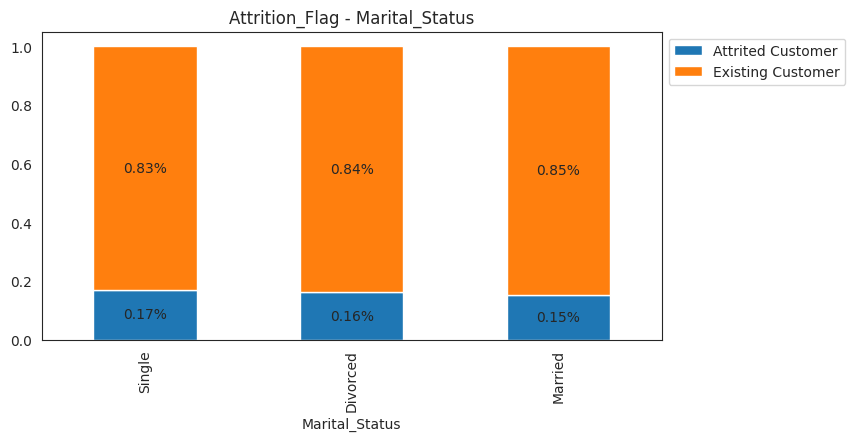

In [36]:
# Marital_status - Attrition_Flag
labelled_stacked_bar(df, 'Marital_Status','Attrition_Flag')

**Observation**:

* The percentage of attritation is highest in Single customers.
* The percentage of attritation is least in Married customers.

Attrition_Flag   Attrited Customer  Existing Customer    All
Income_Category                                             
All                           1627               8500  10127
Less than $40K                 612               2949   3561
$40K - $60K                    271               1519   1790
$80K - $120K                   242               1293   1535
$60K - $80K                    189               1213   1402
abc                            187                925   1112
$120K +                        126                601    727
------------------------------------------------------------------------------------------------------------------------


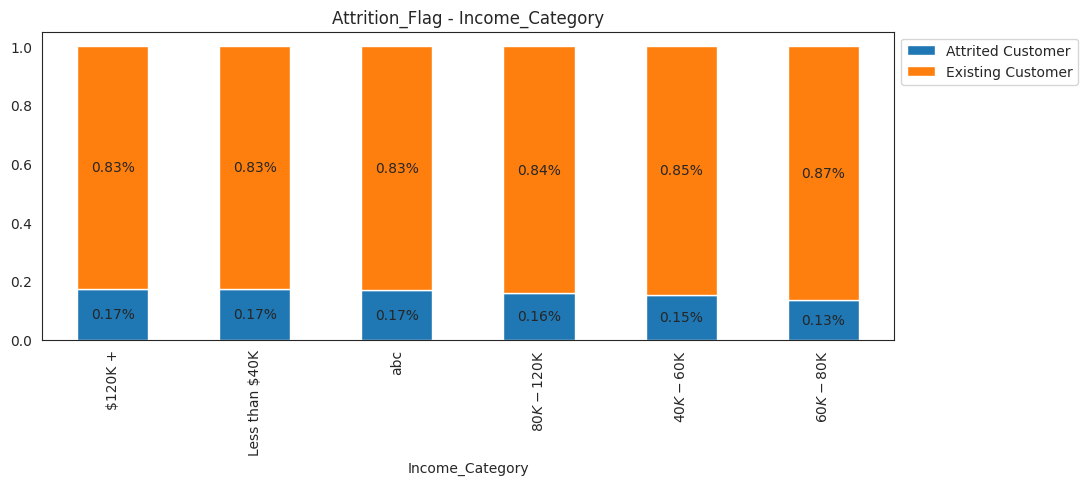

In [37]:
# Income_Category - Attrition_Flag
labelled_stacked_bar(df, 'Income_Category','Attrition_Flag')

**Observations**:
* The percentage of attritation is least in income group \$60K - \$80K.
* The percentage of attritation is highest in income groups $120K + and Less than \$40K

Attrition_Flag  Attrited Customer  Existing Customer    All
Card_Category                                              
All                          1627               8500  10127
Blue                         1519               7917   9436
Silver                         82                473    555
Gold                           21                 95    116
Platinum                        5                 15     20
------------------------------------------------------------------------------------------------------------------------


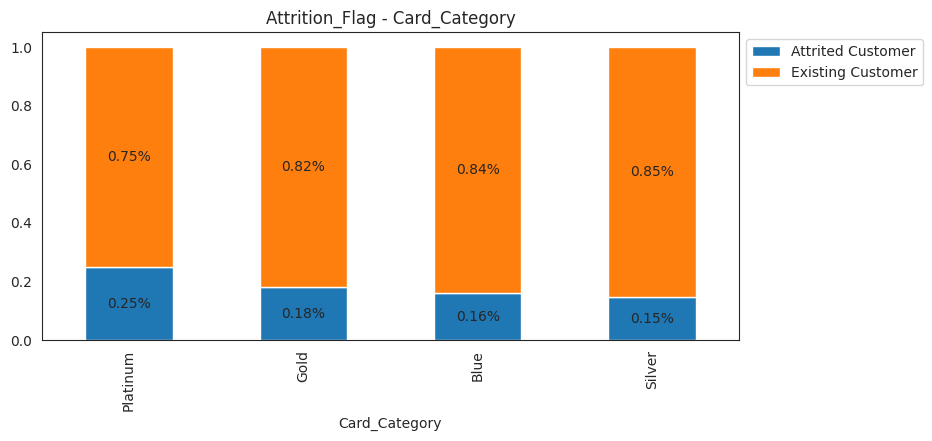

In [38]:
# Card Category - Attrition_Flag
labelled_stacked_bar(df, 'Card_Category','Attrition_Flag')

**Observations**:

* The attrition percentage is highest among Platinum card holders.

* The attrition percentage is the lowest among Silver card holders.

### Insights on EDA

* Approximately 16% of customers have canceled their credit cards.

* A higher number of female customers have used the credit card.

* The majority of customers hold a graduate degree.

* Most customers are married.

* A significant portion of customers belong to the low-income category.

* Customers who discontinued their credit cards have lower total transaction count and amount.

* The attrition percentage is highest among Platinum card holders.

* The Doctorate group has the highest percentage of customers who discontinued credit card usage.

* Older customers tend to maintain longer relationships with the bank.

## Data preprocessing

### Feature Engineering

Create new feature Age_Group from Customer_Age

In [39]:
# Lets create age groups based on the customer age
age_bins = [0, 29, 39, 49, 59, 100]
age_labels = ['Below 30', '30s', '40s', '50s', 'Above 60']
df['Age_Group'] = pd.cut(df['Customer_Age'], bins=age_bins, labels=age_labels)

* CLIENTNUM is a unique identifier for each transaction and can be dropped.

* The field Attrition_Flag_Nr, which maps to Attrition_Flag, will also be dropped.

* Since Customer_Age is translated to Age group , this can be dropped

In [40]:
# set Attrition_Flag_Nr to Attrition_Flag
df['Attrition_Flag'] = df['Attrition_Flag_Nr']

# drop the columns
df = df.drop(['CLIENTNUM','Attrition_Flag_Nr','Customer_Age'], axis=1)

In [41]:
# replace abc in income category with pd.NA
df['Income_Category'] = df['Income_Category'].apply(lambda x : np.nan if x == 'abc' else x)
df['Income_Category'] = df['Income_Category'].astype("category")

### Data Split

To prevent data leakage, the data is first split into train, validation, and test datasets. After splitting, missing values and outliers are handled appropriately.

In [42]:
# set input and output features
X = df.drop('Attrition_Flag', axis=1)
y = df['Attrition_Flag']

cat_fields = X.select_dtypes(include='category').columns.to_list()
num_fields = X.select_dtypes(include='number').columns.to_list()
cat_fields

['Gender',
 'Education_Level',
 'Marital_Status',
 'Income_Category',
 'Card_Category',
 'Age_Group']

In [43]:
num_fields

['Dependent_count',
 'Months_on_book',
 'Total_Relationship_Count',
 'Months_Inactive_12_mon',
 'Contacts_Count_12_mon',
 'Credit_Limit',
 'Total_Revolving_Bal',
 'Avg_Open_To_Buy',
 'Total_Amt_Chng_Q4_Q1',
 'Total_Trans_Amt',
 'Total_Trans_Ct',
 'Total_Ct_Chng_Q4_Q1',
 'Avg_Utilization_Ratio']

In [44]:
# split the data into temp and test data sets
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.2, stratify=y)

# split the temp data set into train and val dataset
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.2, stratify=y_temp)

print(f'shapes for train : {X_train.shape}, val : {X_val.shape}, test:{X_test.shape}')

shapes for train : (6480, 19), val : (1621, 19), test:(2026, 19)


In [45]:
# lets check the percentage of classes in all distributions
print("Train Data set")
print(y_train.value_counts(normalize=True))
print('-'*40)
print("Validation Data set")
print(y_val.value_counts(normalize=True))
print('-'*40)
print("Test Data set")
print(y_test.value_counts(normalize=True))

Train Data set
Attrition_Flag
0   0.84
1   0.16
Name: proportion, dtype: float64
----------------------------------------
Validation Data set
Attrition_Flag
0   0.84
1   0.16
Name: proportion, dtype: float64
----------------------------------------
Test Data set
Attrition_Flag
0   0.84
1   0.16
Name: proportion, dtype: float64


**Observation**:

The target feature is split in equal proportion across classes to ensure balanced representation in the datasets.

### Treat Missing Values

In [46]:
# process the income category
X['Income_Category'].value_counts(normalize=True, dropna=False)

,proportion
Income_Category,
Less than $40K,0.35
$40K - $60K,0.18
$80K - $120K,0.15
$60K - $80K,0.14
NaN,0.11
$120K +,0.07


* There are about 11% of records for which income range is 'abc'.

In [47]:
X['Income_Category'].value_counts(dropna=False)

,count
Income_Category,
Less than $40K,3561
$40K - $60K,1790
$80K - $120K,1535
$60K - $80K,1402
NaN,1112
$120K +,727


In [48]:
# check for the missing values
X.isna().sum()

,0
Gender,0
Dependent_count,0
Education_Level,1519
Marital_Status,749
Income_Category,1112
Card_Category,0
Months_on_book,0
Total_Relationship_Count,0
Months_Inactive_12_mon,0
Contacts_Count_12_mon,0


The following fields have missing values
* Education_Level
* Marital_Status
* Income_Category



In [49]:
# Lets print the percentages
df['Education_Level'].value_counts(normalize=True, dropna=False)

,proportion
Education_Level,
Graduate,0.31
High School,0.20
NaN,0.15
Uneducated,0.15
College,0.10
Post-Graduate,0.05
Doctorate,0.04


* Since about 15% of customers have missing education level data, it is likely that they preferred not to disclose this information or the data is not available

* These missing values will be replaced with the mode strategy.

In [50]:
df['Marital_Status'].value_counts(normalize=True, dropna=False)

,proportion
Marital_Status,
Married,0.46
Single,0.39
NaN,0.07
Divorced,0.07


* Approximately 7% of the data contains missing values, which could be due to customers not disclosing information or data unavailability.

* The missing values will be replaced with the mode of the this feature.

In [51]:
# Take the backup of training, validation and testing data
X_train_bk = X_train.copy()
y_train_bk = y_train.copy()

X_val_bk = X_val.copy()
y_val_bk = y_val.copy()

X_test_bk = X_test.copy()
y_test_bk = y_test.copy()

In [52]:
# lets replace the null values in the category fields with mode
imputerMode = SimpleImputer(strategy="most_frequent")
# Fit and transform on Train data
# X_train = pd.DataFrame(imputerMode.fit_transform(X_train),columns=X_train.columns)
X_train[:] = imputerMode.fit_transform(X_train[:])

# Only transform on Validation and Test data to avoid data leakage
X_val[:] = imputerMode.transform(X_val[:])
X_test[:] = imputerMode.transform(X_test[:])

In [53]:
# Veify that there are no more null values in Train data set
X_train.isna().values.any()

np.False_

In [54]:
# Veify that there are no more null values in Validation data set
X_val.isna().values.any()

np.False_

In [55]:
# Veify that there are no more null values in Test data set
X_test.isna().values.any()

np.False_

In [56]:
X_train['Income_Category'].value_counts(dropna=False)

,count
Income_Category,
Less than $40K,2998
$40K - $60K,1147
$80K - $120K,985
$60K - $80K,869
$120K +,481


### Handle Outliers

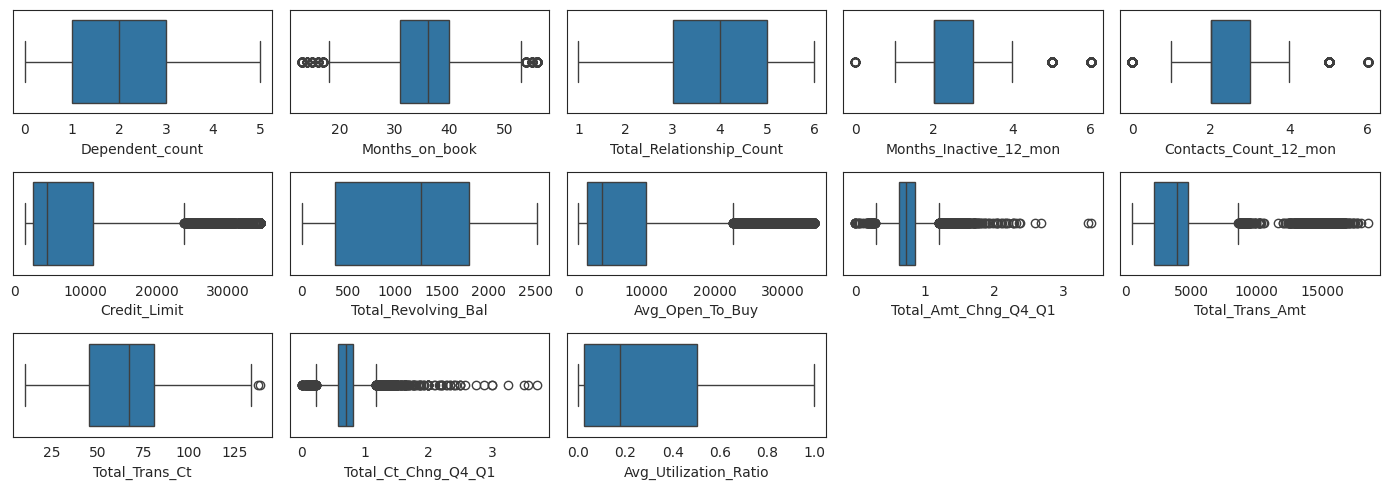

In [57]:
# visualize outliers
plt.figure(figsize=(14,5))
for i,feature in enumerate(X.select_dtypes(include='number').columns.to_list()):
  plt.subplot(3,5,i+1)
  sns.boxplot(X, x=feature)
plt.tight_layout()
plt.show()

**Observation**:

The following features have outliers

 * Months_on_book
 * Months_Inactive_12_mon
 * Contacts_Count_12_mon
 * Credit_Limit
 * Avg_Open_To_Buy
 * Total_Amt_Chng_Q4_Q1
 * Total_Trans_Amt
 * Total_Trans_Ct
 * Total_Ct_Chng_Q4_Q1
 * Avg_Utilization_Ratio

All the above outliers seems to be genuine and hence they are not handled.

In [58]:
X_train.isnull().sum()

,0
Gender,0
Dependent_count,0
Education_Level,0
Marital_Status,0
Income_Category,0
Card_Category,0
Months_on_book,0
Total_Relationship_Count,0
Months_Inactive_12_mon,0
Contacts_Count_12_mon,0


### One Hot encoding

In [59]:
cat_fields

['Gender',
 'Education_Level',
 'Marital_Status',
 'Income_Category',
 'Card_Category',
 'Age_Group']

In [60]:
num_fields

['Dependent_count',
 'Months_on_book',
 'Total_Relationship_Count',
 'Months_Inactive_12_mon',
 'Contacts_Count_12_mon',
 'Credit_Limit',
 'Total_Revolving_Bal',
 'Avg_Open_To_Buy',
 'Total_Amt_Chng_Q4_Q1',
 'Total_Trans_Amt',
 'Total_Trans_Ct',
 'Total_Ct_Chng_Q4_Q1',
 'Avg_Utilization_Ratio']

In [61]:
colTransformer = ColumnTransformer(
    transformers = [
        ('cat', OneHotEncoder(sparse_output=False, handle_unknown='ignore', dtype='int'), cat_fields),
        ('num', 'passthrough', num_fields)
    ]
)

# Fit and transform train data
ohe_data_train = colTransformer.fit_transform(X_train)
feature_names = colTransformer.get_feature_names_out()
X_train = pd.DataFrame(ohe_data_train, columns=feature_names)

# transform validation data
X_val = pd.DataFrame(colTransformer.transform(X_val), columns=feature_names)

#transform test data
X_test = pd.DataFrame(colTransformer.transform(X_test), columns=feature_names)

X_train.head()

,cat__Gender_F,cat__Gender_M,cat__Education_Level_College,cat__Education_Level_Doctorate,cat__Education_Level_Graduate,cat__Education_Level_High School,cat__Education_Level_Post-Graduate,cat__Education_Level_Uneducated,cat__Marital_Status_Divorced,cat__Marital_Status_Married,cat__Marital_Status_Single,cat__Income_Category_$120K +,cat__Income_Category_$40K - $60K,cat__Income_Category_$60K - $80K,cat__Income_Category_$80K - $120K,cat__Income_Category_Less than $40K,cat__Card_Category_Blue,cat__Card_Category_Gold,cat__Card_Category_Platinum,cat__Card_Category_Silver,cat__Age_Group_30s,cat__Age_Group_40s,cat__Age_Group_50s,cat__Age_Group_Above 60,cat__Age_Group_Below 30,num__Dependent_count,num__Months_on_book,num__Total_Relationship_Count,num__Months_Inactive_12_mon,num__Contacts_Count_12_mon,num__Credit_Limit,num__Total_Revolving_Bal,num__Avg_Open_To_Buy,num__Total_Amt_Chng_Q4_Q1,num__Total_Trans_Amt,num__Total_Trans_Ct,num__Total_Ct_Chng_Q4_Q1,num__Avg_Utilization_Ratio
0,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,43.00,1.00,3.00,2.00,9525.00,2517.00,7008.00,0.67,4804.00,79.00,0.88,0.26
1,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,3.00,28.00,5.00,3.00,2.00,5393.00,2509.00,2884.00,0.68,4769.00,102.00,0.73,0.47
2,1.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,2.00,40.00,4.00,3.00,3.00,2783.00,2379.00,404.00,0.91,3897.00,74.00,1.00,0.85
3,0.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,1.00,0.00,0.00,0.00,2.00,36.00,6.00,2.00,0.00,27000.00,0.00,27000.00,0.61,1209.00,39.00,0.30,0.00
4,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,36.00,3.00,2.00,2.00,2615.00,1772.00,843.00,0.61,1419.00,38.00,0.36,0.68


## Model Building

### Model Evalaution Criteria

The model has to be designed to predict whether a customer will continue using the credit card (0) or discontinue its usage (1).

The model would make wrong predictions.

* False Positive (FP): The model predicts that the customer will stop using the credit card, but they actually continue using it.

* False Negative (FN): The model predicts that the customer will continue using the credit card, but they actually discontinue it.


The focus is on reducing False Negatives (FN) so that Thera Bank can identify customers at risk of attrition and target them with campaigns, offers, and retention strategies.

Therefore, **the model prioritizes improving the recall rate** to capture as many actual attritions as possible.

In [62]:
# recall scoring
scorer = metrics.make_scorer(recall_score)

In [63]:
# function to compute model performance metrics
def model_performance_classification_sklearn(model, Xin_train, yout_train, Xin_test, yout_test, test=False ):

  y_pred_train = model.predict(Xin_train)
  acc_train = accuracy_score(yout_train , y_pred_train)
  recall_train = recall_score(yout_train, y_pred_train)
  precision_train = precision_score(yout_train, y_pred_train)
  f1_train = f1_score(yout_train, y_pred_train)

  y_pred_test = model.predict(Xin_test)
  acc_test = accuracy_score(yout_test , y_pred_test)
  recall_test = recall_score(yout_test, y_pred_test)
  precision_test = precision_score(yout_test, y_pred_test)
  f1_test = f1_score(yout_test, y_pred_test)

  # create a dataframe for metrics
  df_metrics = pd.DataFrame(
         {
          "Train Accuracy": acc_train,
          "Validation Accuracy": acc_test,
          "Train Recall": recall_train,
          "Validation Recall": recall_test,
          "Train Precision": precision_train,
          "Validation Precision": precision_test,
          "Train F1": f1_train,
          "Validation F1": f1_test,
          },
        index=[0],)
  if test:
    df_metrics.columns = ["Train Accuracy", "Test Accuracy", "Train Recall", "Test Recall",  "Train Precision", "Test Precision", "Train F1", "Test F1"]
  return df_metrics

In [64]:
# function to plot confusion matrix
def confusion_matrix_sklearn(model, Xin_train, yout_train, Xin_test, yout_test, title=None):

  if title == None:
    title = str(model)

  y_pred_train = model.predict(Xin_train)
  cm_train = confusion_matrix(yout_train, y_pred_train)

  # lets compute percentages for train data
  labels_train = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm_train.flatten().sum())]
            for item in cm_train.flatten()
        ]
    ).reshape(2, 2)

  plt.figure(figsize=(10,4))
  plt.subplot(1,2,1)
  sns.heatmap(cm_train, annot=labels_train, fmt='', cmap='Blues')
  plt.title(f'Confusion Matrix: {title} - Train data', fontsize=10)
  plt.ylabel('True label')
  plt.xlabel('Predicted label')

  y_pred_test = model.predict(Xin_test)
  cm_test = confusion_matrix(yout_test, y_pred_test)

  # lets compute percentages for test data
  labels_test = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm_test.flatten().sum())]
            for item in cm_test.flatten()
        ]
    ).reshape(2, 2)
  plt.subplot(1,2,2)
  sns.heatmap(cm_test, annot=labels_test, fmt='', cmap='Blues')
  plt.title(f'Confusion Matrix: {title} - Test data', fontsize=10)
  plt.ylabel('True label')
  plt.xlabel('Predicted label')


  plt.tight_layout()
  plt.show()

In [65]:
# Function to concat the metrics for a list of models
def concat_model_metrics(models, X_tr, y_tr, test=False):
  eval_df = pd.DataFrame()
  model_names = []
  for name,model in models:
    model_names.append(name)
    if test:
      eval_df = pd.concat([eval_df, model_performance_classification_sklearn(model, X_tr, y_tr, X_test, y_test)])
    else:
      eval_df = pd.concat([eval_df, model_performance_classification_sklearn(model, X_tr, y_tr, X_val, y_val)])
  if test:
    eval_df.columns = ["Train Accuracy", "Test Accuracy", "Train Recall", "Test Recall", "Train Precision", "Test Precision", "Train F1", "Test F1" ]
  eval_df.index = model_names
  return eval_df.reset_index().rename(columns={'index': 'Model'})

In [66]:
# function to plot importantant features in the tree building
def plot_important_features(model, X_tr_in):
  importances = model.feature_importances_
  indices = np.argsort(importances)
  feature_names = list(X_tr_in.columns)

  plt.figure(figsize=(8, 8))
  plt.title("Feature Importances")
  plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
  plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
  plt.xlabel("Relative Importance")
  plt.show()

### Model buidling - Original data

Lets build the initial models with default parameters and evaluate using K-fold and crossvalscore

In [67]:
# This function analyzes the cross validation score for the given train data
def analyze_cross_validation_scores(models, X_tr, y_tr, X_v, y_v):
  """
  This function takes the list of model_names and analyze cv_scores and recall score on validation set
  outputs cv_scores list, model_names
  """
  cv_scores = []
  model_names = []

  print("Cross Validation performance on Train data")
  # score the models with default parameters on recall_score
  for name, model in models:
    # kfold with 5 splits
    kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state = 42)
    cv_result = cross_val_score(estimator = model, X = X_tr, y = y_tr, scoring=scorer, cv=kfold )
    cv_scores.append(cv_result)
    model_names.append(name)
    print(f"{name}: {cv_result.mean()} : {cv_result}")
  print('-'*100)

  print("Performance on Validation data")
  # Fit the models
  for name, model in models:
    model.fit(X_tr, y_tr)
    rscore = recall_score(y_v, model.predict(X_v))
    print(f"{name}: {rscore}")
  print('-'*100)

  return cv_scores, model_names

In [68]:
# This function plots the cv scores using box plot
def cv_score_boxplot(cv_scores, model_names, title = 'CV scores'):
  fig = plt.figure(figsize=(12,5))
  fig.suptitle(f'{title}')
  ax = sns.boxplot(cv_scores, color='violet', showmeans=True)
  ax.set_xticks(range(len(model_names)))
  ax.set_xticklabels(model_names)
  plt.show()

In [69]:
# initialize the models
models = [
    ("Dtree", DecisionTreeClassifier(random_state=42)),
    ("Bagging", BaggingClassifier(random_state=42)),
    ("Random Forest", RandomForestClassifier(random_state=42)),
    ("Adaboost", AdaBoostClassifier(random_state=42)),
    ("GBM", GradientBoostingClassifier(random_state=42)),
    ("Xgboost", XGBClassifier(random_state=42, eval_metric="logloss"))
]

models

[('Dtree', DecisionTreeClassifier(random_state=42)),
 ('Bagging', BaggingClassifier(random_state=42)),
 ('Random Forest', RandomForestClassifier(random_state=42)),
 ('Adaboost', AdaBoostClassifier(random_state=42)),
 ('GBM', GradientBoostingClassifier(random_state=42)),
 ('Xgboost',
  XGBClassifier(base_score=None, booster=None, callbacks=None,
                colsample_bylevel=None, colsample_bynode=None,
                colsample_bytree=None, device=None, early_stopping_rounds=None,
                enable_categorical=False, eval_metric='logloss',
                feature_types=None, gamma=None, grow_policy=None,
                importance_type=None, interaction_constraints=None,
                learning_rate=None, max_bin=None, max_cat_threshold=None,
                max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
                max_leaves=None, min_child_weight=None, missing=nan,
                monotone_constraints=None, multi_strategy=None, n_estimators=None,
        

In [70]:
%%time
# Analyze cross validation scores on different models
cv_scores, model_names = analyze_cross_validation_scores(models, X_train, y_train, X_val, y_val)

Cross Validation performance on Train data
Dtree: 0.7915485829959514 : [0.78365385 0.78846154 0.75961538 0.83653846 0.78947368]
Bagging: 0.817487118145013 : [0.84615385 0.80288462 0.77403846 0.85096154 0.81339713]
Random Forest: 0.7608437615016562 : [0.76442308 0.76442308 0.72596154 0.82692308 0.72248804]
Adaboost: 0.744493006993007 : [0.72115385 0.75480769 0.65384615 0.86538462 0.72727273]
GBM: 0.835760949576739 : [0.80769231 0.86057692 0.78846154 0.91346154 0.80861244]
Xgboost: 0.8751334192123664 : [0.86538462 0.87980769 0.84615385 0.92307692 0.86124402]
----------------------------------------------------------------------------------------------------
Performance on Validation data
Dtree: 0.8007662835249042
Bagging: 0.8199233716475096
Random Forest: 0.7701149425287356
Adaboost: 0.7586206896551724
GBM: 0.8237547892720306
Xgboost: 0.8888888888888888
----------------------------------------------------------------------------------------------------
CPU times: user 23.8 s, sys: 248 ms

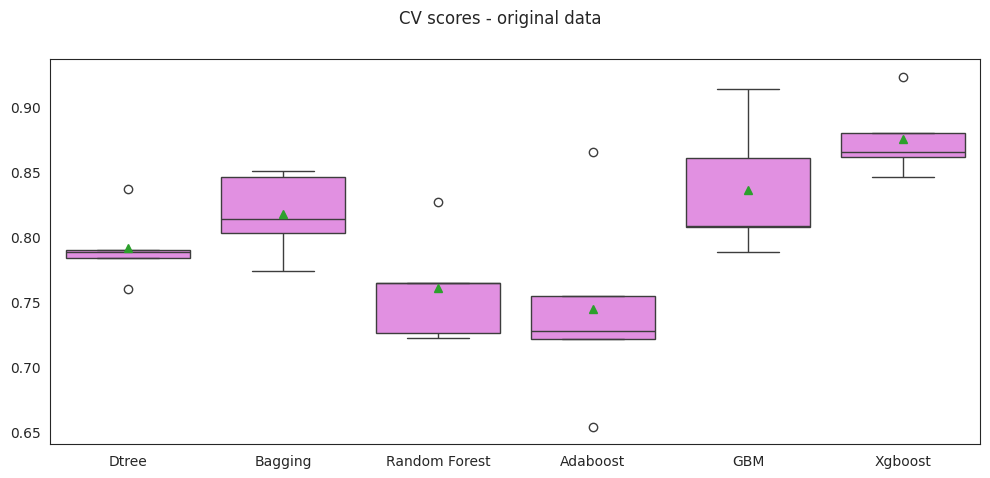

In [71]:
# plot the box plot to compare cv scores of the models
cv_score_boxplot(cv_scores, model_names, 'CV scores - original data')

**Observations**:

* XGBoost appears to perform the best in terms of recall score, even with default parameters.

* GBM and Bagging models also show strong performance, making them reliable alternatives.

In [72]:
# lets compare the metrics for default models
concat_model_metrics(models, X_train, y_train)

,Model,Train Accuracy,Validation Accuracy,Train Recall,Validation Recall,Train Precision,Validation Precision,Train F1,Validation F1
0,Dtree,1.00,0.94,1.00,0.80,1.00,0.81,1.00,0.81
1,Bagging,1.00,0.95,0.98,0.82,1.00,0.87,0.99,0.85
2,Random Forest,1.00,0.95,1.00,0.77,1.00,0.91,1.00,0.83
3,Adaboost,0.95,0.94,0.78,0.76,0.88,0.86,0.83,0.80
4,GBM,0.98,0.96,0.89,0.82,0.96,0.91,0.92,0.87
5,Xgboost,1.00,0.97,1.00,0.89,1.00,0.94,1.00,0.91


**Observations**

* XGBoost achieves the highest recall score, followed by GBM.

* Precision is highest in GBM and Random Forest, followed by XGM.

* F1 Score is best in XGBoost, with GBM as the next best.

* Accuracy is highest in both XGBoost,GBM and then in Bagging.

Overall, XGBoost demonstrates the best performance across key metrics even with default parameters, making it the top-performing model, closely followed by GBM.

### Model buidling - Oversampled data

Lets fit the models with oversampled data and analyze the performance

In [73]:
# size of the train data set
X_train.shape

(6480, 38)

In [74]:
# size of the classes before oversampled
y_train.value_counts()

,count
Attrition_Flag,
0,5439
1,1041


In [75]:
# oversample the train data set using SMOTE
# Synthetic Minority Oversampling Technique
sm = SMOTE(sampling_strategy=1, k_neighbors = 5, random_state=42)

# oversample the train data
y_train = y_train.astype(int)
X_train_over, y_train_over = sm.fit_resample(X_train, y_train)

In [76]:
# print the shape  for oversample
X_train_over.shape

(10878, 38)

In [77]:
# size of the classes after oversampled
y_train_over.value_counts()

,count
Attrition_Flag,
0,5439
1,5439


**Observations**:

* The minority class is oversampled from 1041 to 5439 to address class imbalance

In [78]:
# initialize the models for oversampled data
models_os = [
    ("Dtree over", DecisionTreeClassifier(random_state=42)),
    ("Bagging over", BaggingClassifier(random_state=42)),
    ("Random Forest over", RandomForestClassifier(random_state=42)),
    ("Adaboost over", AdaBoostClassifier(random_state=42)),
    ("GBM over", GradientBoostingClassifier(random_state=42)),
    ("Xgboost over", XGBClassifier(random_state=42, eval_metric="logloss"))
]

models_os

[('Dtree over', DecisionTreeClassifier(random_state=42)),
 ('Bagging over', BaggingClassifier(random_state=42)),
 ('Random Forest over', RandomForestClassifier(random_state=42)),
 ('Adaboost over', AdaBoostClassifier(random_state=42)),
 ('GBM over', GradientBoostingClassifier(random_state=42)),
 ('Xgboost over',
  XGBClassifier(base_score=None, booster=None, callbacks=None,
                colsample_bylevel=None, colsample_bynode=None,
                colsample_bytree=None, device=None, early_stopping_rounds=None,
                enable_categorical=False, eval_metric='logloss',
                feature_types=None, gamma=None, grow_policy=None,
                importance_type=None, interaction_constraints=None,
                learning_rate=None, max_bin=None, max_cat_threshold=None,
                max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
                max_leaves=None, min_child_weight=None, missing=nan,
                monotone_constraints=None, multi_strategy=Non

In [79]:
%%time
# Analyze cross validation scores on different models
cv_scores_os, model_names_os = analyze_cross_validation_scores(models_os, X_train_over, y_train_over, X_val, y_val)

Cross Validation performance on Train data
Dtree over: 0.9551389415011636 : [0.95404412 0.95128676 0.95496324 0.95584177 0.95955882]
Bagging over: 0.9635933018561611 : [0.95496324 0.96966912 0.97610294 0.9475621  0.96966912]
Random Forest over: 0.9749947575626386 : [0.98161765 0.97426471 0.97610294 0.97148114 0.97150735]
Adaboost over: 0.9555059121164564 : [0.94577206 0.96231618 0.96599265 0.95216191 0.95128676]
GBM over: 0.9748105958114618 : [0.97977941 0.97518382 0.97242647 0.96964121 0.97702206]
Xgboost over: 0.9819814045673466 : [0.98253676 0.98345588 0.984375   0.97884085 0.98069853]
----------------------------------------------------------------------------------------------------
Performance on Validation data
Dtree over: 0.789272030651341
Bagging over: 0.842911877394636
Random Forest over: 0.789272030651341
Adaboost over: 0.7777777777777778
GBM over: 0.8467432950191571
Xgboost over: 0.8773946360153256
----------------------------------------------------------------------------

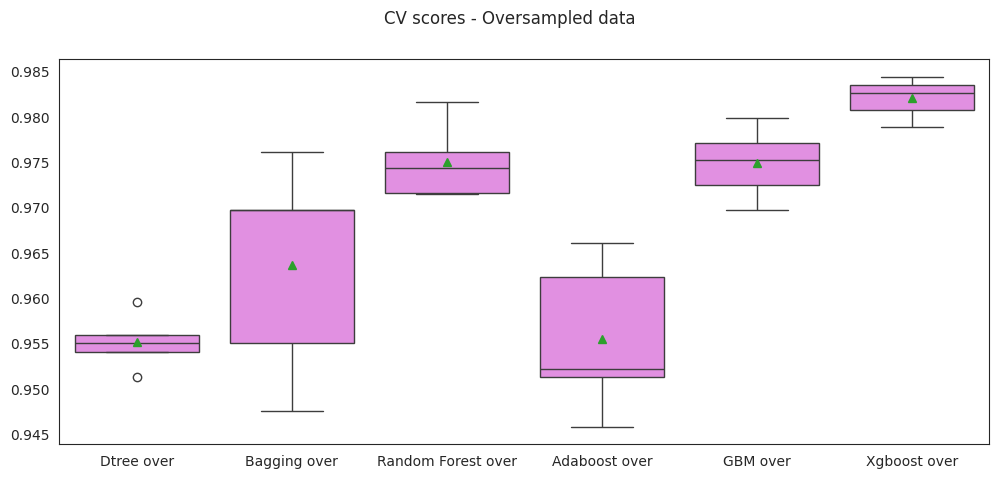

In [80]:
# plot the box plot to compare cv scores of the models
cv_score_boxplot(cv_scores_os, model_names_os, 'CV scores - Oversampled data')

**Observations**:

* XGBoost demonstrates the best recall performance, even when using default parameters.

* GBM and Random Forest models also perform well.

In [81]:
# lets compare the metrics for default models on oversampled data
concat_model_metrics(models_os, X_train_over, y_train_over)

,Model,Train Accuracy,Validation Accuracy,Train Recall,Validation Recall,Train Precision,Validation Precision,Train F1,Validation F1
0,Dtree over,1.00,0.93,1.00,0.79,1.00,0.76,1.00,0.77
1,Bagging over,1.00,0.95,1.00,0.84,1.00,0.84,1.00,0.84
2,Random Forest over,1.00,0.95,1.00,0.79,1.00,0.88,1.00,0.83
3,Adaboost over,0.96,0.93,0.96,0.78,0.96,0.78,0.96,0.78
4,GBM over,0.98,0.95,0.98,0.85,0.98,0.87,0.98,0.86
5,Xgboost over,1.00,0.97,1.00,0.88,1.00,0.93,1.00,0.90


**Observations**:

* Recall score is highest with XGboost, followed by GBM.

* Precision score is highest with XGBoost, followed by GBM.

* F1 score is best in XGBoost and GBM, followed by Random Forest.

* Accuracy is highest in XGBoost followed by GBM

### Model building - Undersampled data

Lets fit the models with oversampled data and analyze the performance

In [82]:
# shape of original train data
X_train.shape

(6480, 38)

In [83]:
# original class counts
y_train.value_counts()

,count
Attrition_Flag,
0,5439
1,1041


In [84]:
# Undersample the training data using RandomUnderSampler
rus = RandomUnderSampler(sampling_strategy=1, random_state=42)
X_train_under, y_train_under = rus.fit_resample(X_train, y_train)

In [85]:
# shape of undersampled data
X_train_under.shape

(2082, 38)

In [86]:
# undersampled class counts
y_train_under.value_counts()

,count
Attrition_Flag,
0,1041
1,1041


**Observations**:

* The majority class is lowered from 5439 to 1041 to address the class imbalance problem.

In [87]:
# initialize the models for undersampled data
models_us = [
    ("Dtree under", DecisionTreeClassifier(random_state=42)),
    ("Bagging under", BaggingClassifier(random_state=42)),
    ("Random Forest under", RandomForestClassifier(random_state=42)),
    ("Adaboost under", AdaBoostClassifier(random_state=42)),
    ("GBM under", GradientBoostingClassifier(random_state=42)),
    ("Xgboost under", XGBClassifier(random_state=42, eval_metric="logloss"))
]

models_us

[('Dtree under', DecisionTreeClassifier(random_state=42)),
 ('Bagging under', BaggingClassifier(random_state=42)),
 ('Random Forest under', RandomForestClassifier(random_state=42)),
 ('Adaboost under', AdaBoostClassifier(random_state=42)),
 ('GBM under', GradientBoostingClassifier(random_state=42)),
 ('Xgboost under',
  XGBClassifier(base_score=None, booster=None, callbacks=None,
                colsample_bylevel=None, colsample_bynode=None,
                colsample_bytree=None, device=None, early_stopping_rounds=None,
                enable_categorical=False, eval_metric='logloss',
                feature_types=None, gamma=None, grow_policy=None,
                importance_type=None, interaction_constraints=None,
                learning_rate=None, max_bin=None, max_cat_threshold=None,
                max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
                max_leaves=None, min_child_weight=None, missing=nan,
                monotone_constraints=None, multi_strate

In [88]:
%%time
# Analyze cross validation scores on different models
cv_scores_us, model_names_us = analyze_cross_validation_scores(models_us, X_train_under, y_train_under, X_val, y_val)

Cross Validation performance on Train data
Dtree under: 0.8847580051527422 : [0.90865385 0.85167464 0.92307692 0.87980769 0.86057692]
Bagging under: 0.9078165255796835 : [0.91346154 0.8708134  0.94230769 0.91346154 0.89903846]
Random Forest under: 0.9346935958778063 : [0.9375     0.91866029 0.95673077 0.91346154 0.94711538]
Adaboost under: 0.9289381670960619 : [0.94230769 0.90430622 0.94230769 0.92788462 0.92788462]
GBM under: 0.9510443503864557 : [0.95673077 0.9138756  0.97115385 0.96153846 0.95192308]
Xgboost under: 0.9596797938903203 : [0.96153846 0.93301435 0.97115385 0.95673077 0.97596154]
----------------------------------------------------------------------------------------------------
Performance on Validation data
Dtree under: 0.8812260536398467
Bagging under: 0.9195402298850575
Random Forest under: 0.9386973180076629
Adaboost under: 0.9425287356321839
GBM under: 0.946360153256705
Xgboost under: 0.9578544061302682
--------------------------------------------------------------

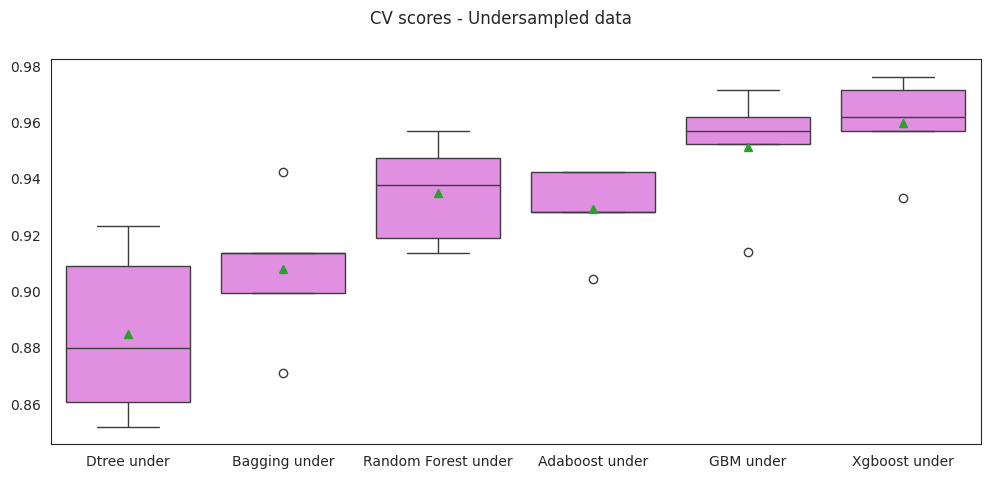

In [89]:
# plot the box plot to compare cv scores of the models
cv_score_boxplot(cv_scores_us, model_names_us, 'CV scores - Undersampled data')

**Observations**:
* XGBoost and GBM are performing very well on cross-validation scores

* AdaBoost and Random Forest also achieve strong CV scores, making them effective models as well.

In [90]:
# lets compare the metrics for default models on undersampled data
concat_model_metrics(models_us, X_train_under, y_train_under)

,Model,Train Accuracy,Validation Accuracy,Train Recall,Validation Recall,Train Precision,Validation Precision,Train F1,Validation F1
0,Dtree under,1.00,0.88,1.00,0.88,1.00,0.59,1.00,0.71
1,Bagging under,1.00,0.92,1.00,0.92,1.00,0.69,1.00,0.79
2,Random Forest under,1.00,0.93,1.00,0.94,1.00,0.72,1.00,0.82
3,Adaboost under,0.94,0.92,0.95,0.94,0.93,0.68,0.94,0.79
4,GBM under,0.98,0.93,0.98,0.95,0.98,0.72,0.98,0.82
5,Xgboost under,1.00,0.95,1.00,0.96,1.00,0.76,1.00,0.85


**Observations**:

* XGBoost achieves the highest recall rate, followed by GBM and Random Forest.

* Precision is low across all models, indicating some trade-off in correctly identifying positive predictions.

* The F1 score is best in XGBoost, followed by GBM, reflecting a good balance between precision and recall.

* All models show strong performance in terms of accuracy.

## Hyperparameter Tuning

The following models are selected for furthur tuning as they are performing well on the class balanced data sets and original data

* Adaboost
* GBM
* XGBoost
* Random Forest

### Adaboost Tuning

The important hyperparameters are

* estimator: The base estimator from which the boosted ensemble is built. By default the base estimator is a decision tree with max_depth=1

* n_estimators: The maximum number of estimators at which boosting is terminated. Default value is 50.

* learning_rate: Learning rate shrinks the contribution of each classifier by learning_rate. There is a trade-off between learning_rate and n_estimators.

In [91]:
# Initilize the model
adb_model = AdaBoostClassifier(random_state=42)

# Hyper parameters
adb_params = {
    "n_estimators" : np.arange(10,110,10),
    "learning_rate" : [0.01, 0.05, 0.1, 0.2, 1 ],
    "estimator" : [
        DecisionTreeClassifier(max_depth=1, random_state=42),
        DecisionTreeClassifier(max_depth=2, random_state=42),
        DecisionTreeClassifier(max_depth=3, random_state=42),
    ],
}

#### Adaboost - Gridsearch CV

Find the best parameters using GridSearchCV

In [92]:
%%time

# Calling the GridSearchCV
adb_grid_cv = GridSearchCV(estimator = adb_model, param_grid = adb_params, scoring=scorer, cv=5 , n_jobs=-1)

# Fit the parameters in GridSearchCV
adb_grid_cv.fit(X_train, y_train)

# print the best params
print(f"Adaboost Grid Search CV : Best params : {adb_grid_cv.best_params_}")
print(f"Adaboost Grid Search CV : Best score : {adb_grid_cv.best_score_}")
print("-"*100)

Adaboost Grid Search CV : Best params : {'estimator': DecisionTreeClassifier(max_depth=3, random_state=42), 'learning_rate': 1, 'n_estimators': np.int64(90)}
Adaboost Grid Search CV : Best score : 0.878951969083548
----------------------------------------------------------------------------------------------------
CPU times: user 5.85 s, sys: 677 ms, total: 6.53 s
Wall time: 7min 40s


In [93]:
# set the best params for the model
adb_tuned_model = AdaBoostClassifier(random_state=42,
                                     estimator = adb_grid_cv.best_params_['estimator'],
                                     learning_rate = adb_grid_cv.best_params_['learning_rate'],
                                     n_estimators = adb_grid_cv.best_params_['n_estimators']
                                    )
print(adb_tuned_model)

AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=3,
                                                    random_state=42),
                   learning_rate=1, n_estimators=np.int64(90), random_state=42)


In [94]:
# fit the model
adb_tuned_model.fit(X_train, y_train)

AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=3,
                                                    random_state=42),
                   learning_rate=1, n_estimators=np.int64(90), random_state=42)

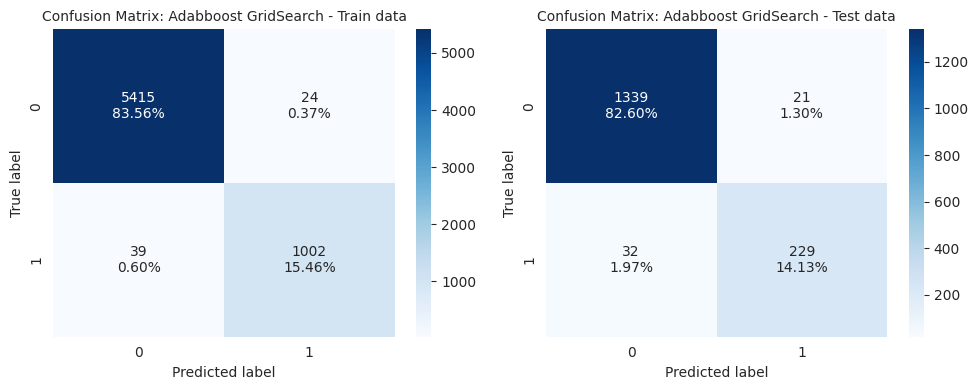

In [95]:
# compare the confusion matrix
confusion_matrix_sklearn(adb_tuned_model, X_train, y_train, X_val, y_val, title='Adabboost GridSearch')

**Observations**:

* The results show slight variation but are generally consistent between the training and validation sets.

In [96]:
# analyze the metrics
adb_gs_metrics = model_performance_classification_sklearn(adb_tuned_model, X_train, y_train, X_val, y_val )
adb_gs_metrics

,Train Accuracy,Validation Accuracy,Train Recall,Validation Recall,Train Precision,Validation Precision,Train F1,Validation F1
0,0.99,0.97,0.96,0.88,0.98,0.92,0.97,0.90


**Observations**:

* The recall rate is high on training data and slightly low on validation data set.
* The recall rate is varying slightly indicating that the model is slightly overfitting.

#### Adaboost - RandomizedSearchCV

In [97]:
%%time

# call the randomized search CV
adb_rds_cv = RandomizedSearchCV(estimator = adb_model, param_distributions = adb_params, scoring = scorer, n_jobs = -1, n_iter=50, random_state=42)

# Fit the data in RandomizedSearchCV
adb_rds_cv.fit(X_train, y_train)

# print the best params
print(f"Adaboost Randomized Search CV : Best params : {adb_rds_cv.best_params_}")
print(f"Adaboost Randomized Search CV : Best score : {adb_rds_cv.best_score_}")
print("-"*100)

Adaboost Randomized Search CV : Best params : {'n_estimators': np.int64(70), 'learning_rate': 1, 'estimator': DecisionTreeClassifier(max_depth=3, random_state=42)}
Adaboost Randomized Search CV : Best score : 0.8712550607287449
----------------------------------------------------------------------------------------------------
CPU times: user 2.77 s, sys: 215 ms, total: 2.98 s
Wall time: 2min 34s


In [98]:
# set the best params for the model
adb_tuned2_model = AdaBoostClassifier(random_state=42,
                                     estimator = adb_rds_cv.best_params_['estimator'],
                                     learning_rate = adb_rds_cv.best_params_['learning_rate'],
                                     n_estimators = adb_rds_cv.best_params_['n_estimators']
                                    )
print(adb_tuned2_model)

AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=3,
                                                    random_state=42),
                   learning_rate=1, n_estimators=np.int64(70), random_state=42)


In [99]:
# fit the model
adb_tuned2_model.fit(X_train, y_train)

AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=3,
                                                    random_state=42),
                   learning_rate=1, n_estimators=np.int64(70), random_state=42)

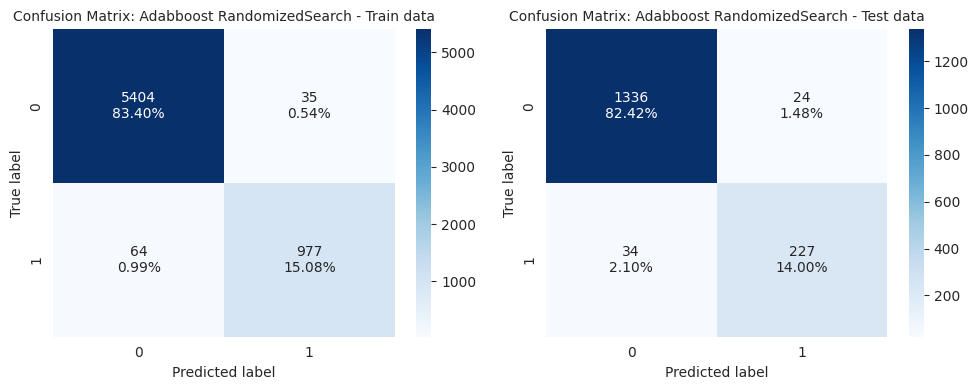

In [100]:
# compare the confusion matrix
confusion_matrix_sklearn(adb_tuned2_model, X_train, y_train, X_val, y_val, title='Adabboost RandomizedSearch')

**Observations**:

* The results are similar to the AdaBoost model with Grid Search on validation data set.


In [101]:
# analyze the metrics
adb_rds_metrics = model_performance_classification_sklearn(adb_tuned2_model, X_train, y_train, X_val, y_val )
adb_rds_metrics

,Train Accuracy,Validation Accuracy,Train Recall,Validation Recall,Train Precision,Validation Precision,Train F1,Validation F1
0,0.98,0.96,0.94,0.87,0.97,0.90,0.95,0.89


**Observations**:

* The recall rate is comparable to that of the AdaBoost model with Grid Search.

* The model is showing signs of generalization, performing consistently across training and validation data.

### GBM - Tuning

The following parameters are tuned for GBM

* n_estimators : Number of trees
* learning_rate : Shrinks the contribution of each tree
* subsample : Fraction of samples used for fitting each tree
* max_features : Number of features to consider when splitting

In [102]:
# initialize the model
gbm_model = GradientBoostingClassifier(random_state=42)

#Parameter grid for GBM
gbm_params={"n_estimators" : np.arange(50,110,10),
            "learning_rate" : [0.1, 0.2],
            "subsample":[0.4, 0.5],
            "max_features":[0.6,0.7,0.8]}

#### GBM - Grid Search CV

In [103]:
%%time

# call the grid search
gbm_gs_cv = GridSearchCV(estimator = gbm_model, param_grid = gbm_params, scoring=scorer, n_jobs = -1, cv=5)
gbm_gs_cv.fit(X_train, y_train)

# print the best params
print(f"GBM Grid Search CV : Best params : {gbm_gs_cv.best_params_}")
print(f"GBM Grid Search CV : Best score : {gbm_gs_cv.best_score_}")
print("-"*100)

GBM Grid Search CV : Best params : {'learning_rate': 0.2, 'max_features': 0.6, 'n_estimators': np.int64(100), 'subsample': 0.5}
GBM Grid Search CV : Best score : 0.8625966139124033
----------------------------------------------------------------------------------------------------
CPU times: user 2.09 s, sys: 248 ms, total: 2.34 s
Wall time: 2min 27s


In [104]:
# set the best params for the model
gbm_tuned_model = GradientBoostingClassifier(random_state=42,
                                     learning_rate = gbm_gs_cv.best_params_['learning_rate'],
                                     max_features = gbm_gs_cv.best_params_['max_features'],
                                     n_estimators = gbm_gs_cv.best_params_['n_estimators'],
                                     subsample = gbm_gs_cv.best_params_['subsample']
                                    )
print(gbm_tuned_model)

GradientBoostingClassifier(learning_rate=0.2, max_features=0.6,
                           n_estimators=np.int64(100), random_state=42,
                           subsample=0.5)


In [105]:
# fit the model
gbm_tuned_model.fit(X_train, y_train)

GradientBoostingClassifier(learning_rate=0.2, max_features=0.6,
                           n_estimators=np.int64(100), random_state=42,
                           subsample=0.5)

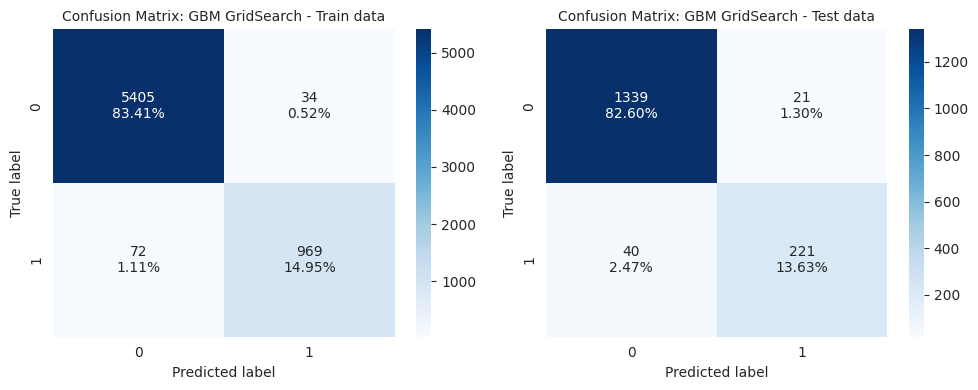

In [106]:
# compare the confusion matrix
confusion_matrix_sklearn(gbm_tuned_model, X_train, y_train, X_val, y_val, title='GBM GridSearch')

**Observations**:

* The percentage of false negatives is comparable on train and data validation data sets.

In [107]:
# analyze the metrics
gbm_gs_metrics = model_performance_classification_sklearn(gbm_tuned_model, X_train, y_train, X_val, y_val )
gbm_gs_metrics

,Train Accuracy,Validation Accuracy,Train Recall,Validation Recall,Train Precision,Validation Precision,Train F1,Validation F1
0,0.98,0.96,0.93,0.85,0.97,0.91,0.95,0.88


**Observations**:
* The recall rate is close compared to AdaBoost.
* The model is generalizing well, as indicated by the consistent performance between the training and validation datasets.


#### GBM - RandomSearch CV

In [108]:
%%time

# call the random search
gbm_rds_cv = RandomizedSearchCV(gbm_model, param_distributions= gbm_params, scoring=scorer, n_iter=50, n_jobs=-1, cv=5, random_state=42)

# fit random search
gbm_rds_cv.fit(X_train, y_train)

# print the best params
print(f"GBM Randomized Search CV : Best params : {gbm_rds_cv.best_params_}")
print(f"GBM Randomized Search CV : Best score : {gbm_rds_cv.best_score_}")
print("-"*100)

GBM Randomized Search CV : Best params : {'subsample': 0.5, 'n_estimators': np.int64(100), 'max_features': 0.6, 'learning_rate': 0.2}
GBM Randomized Search CV : Best score : 0.8625966139124033
----------------------------------------------------------------------------------------------------
CPU times: user 1.71 s, sys: 162 ms, total: 1.87 s
Wall time: 1min 45s


In [109]:
# set the best params for the model
gbm_tuned2_model = GradientBoostingClassifier(random_state=42,
                                     learning_rate = gbm_rds_cv.best_params_['learning_rate'],
                                     max_features = gbm_rds_cv.best_params_['max_features'],
                                     n_estimators = gbm_rds_cv.best_params_['n_estimators'],
                                     subsample = gbm_rds_cv.best_params_['subsample']
                                    )
print(gbm_tuned2_model)

GradientBoostingClassifier(learning_rate=0.2, max_features=0.6,
                           n_estimators=np.int64(100), random_state=42,
                           subsample=0.5)


In [110]:
# fit the model
gbm_tuned2_model.fit(X_train, y_train)

GradientBoostingClassifier(learning_rate=0.2, max_features=0.6,
                           n_estimators=np.int64(100), random_state=42,
                           subsample=0.5)

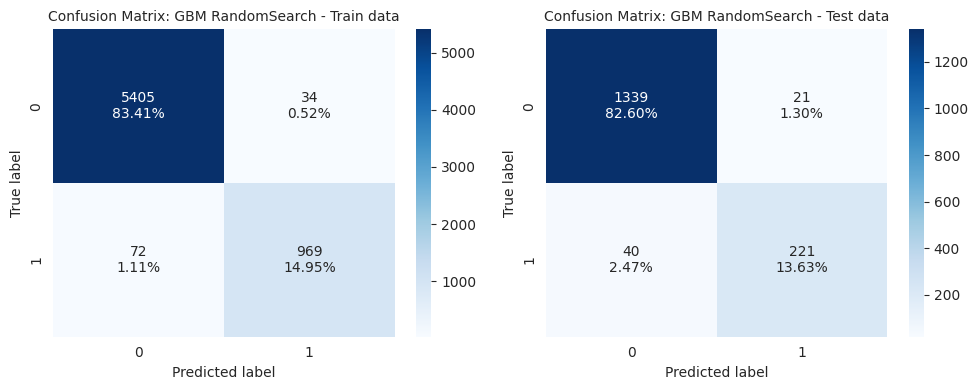

In [111]:
# compare the confusion matrix
confusion_matrix_sklearn(gbm_tuned2_model, X_train, y_train, X_val, y_val, title='GBM RandomSearch')

**Observations**:
The reults are consistent between Train and Test data set.

In [112]:
# analyze the metrics
gbm_rds_metrics = model_performance_classification_sklearn(gbm_tuned2_model, X_train, y_train, X_val, y_val )
gbm_rds_metrics

,Train Accuracy,Validation Accuracy,Train Recall,Validation Recall,Train Precision,Validation Precision,Train F1,Validation F1
0,0.98,0.96,0.93,0.85,0.97,0.91,0.95,0.88


**Observations**:

* The metrics from GBM with Random Search are comparable to those from GBM with Grid Search.

* The model is generalizing well, as reflected in its consistent performance across training and validation datasets.

### XGB Tuned

The hyperparameters for XGB Tuning are as below.

The hyperparameters for XGB Tuning are as below.

- scale_pos_weight: Control the balance of positive and negative weights, useful for unbalanced classes. It has range from 0 to $\infty$.

- subsample: Corresponds to the fraction of observations (the rows) to subsample at each step. By default it is set to 1 meaning that we use all rows.

- colsample_bytree: Corresponds to the fraction of features (the columns) to use.

- colsample_bylevel: The subsample ratio of columns for each level. Columns are subsampled from the set of columns chosen for the current tree.

- colsample_bynode: The subsample ratio of columns for each node (split). Columns are subsampled from the set of columns chosen for the current level.

- max_depth: is the maximum number of nodes allowed from the root to the farthest leaf of a tree.

- learning_rate/eta: Makes the model more robust by shrinking the weights on each step.

- gamma: A node is split only when the resulting split gives a positive reduction in the loss function. Gamma specifies the minimum loss reduction required to make a split.

In [113]:
# Initialize the XGB classifier
xgb_model = XGBClassifier(random_state=42, eval_metric='logloss')

xgb_params = {
    "n_estimators" : np.arange(50,110,10),
    "subsample":[0.3,0.5, 0.6],
    "learning_rate" : [0.1,0.2,1],
    "gamma":[0,1,3],
    "colsample_bytree":[0.7,0.9],
    "colsample_bylevel":[0.7,0.9]
}

#### XGB - Grid Search CV

In [114]:
%%time

# Call the Grid Search CV
xgb_gs_cv = GridSearchCV(xgb_model, param_grid = xgb_params, scoring=scorer, n_jobs=-1, cv=5)

# Fit the Grid Search
xgb_gs_cv.fit(X_train, y_train)

# print the best params
print(f"XGB Grid Search CV : Best params : {xgb_gs_cv.best_params_}")
print(f"XGB Grid Search CV : Best score : {xgb_gs_cv.best_score_}")
print("-"*100)

XGB Grid Search CV : Best params : {'colsample_bylevel': 0.7, 'colsample_bytree': 0.9, 'gamma': 1, 'learning_rate': 0.1, 'n_estimators': np.int64(100), 'subsample': 0.5}
XGB Grid Search CV : Best score : 0.8750828119249171
----------------------------------------------------------------------------------------------------
CPU times: user 9.32 s, sys: 915 ms, total: 10.2 s
Wall time: 6min 41s


In [115]:
# Set the model to the best combination of parameters
xgb_tuned_model = xgb_gs_cv.best_estimator_

# Fit the best algorithm to the data.
xgb_tuned_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=0.7, colsample_bynode=None,
              colsample_bytree=0.9, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=1, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None,
              n_estimators=np.int64(100), n_jobs=None, num_parallel_tree=None,
              random_state=42, ...)

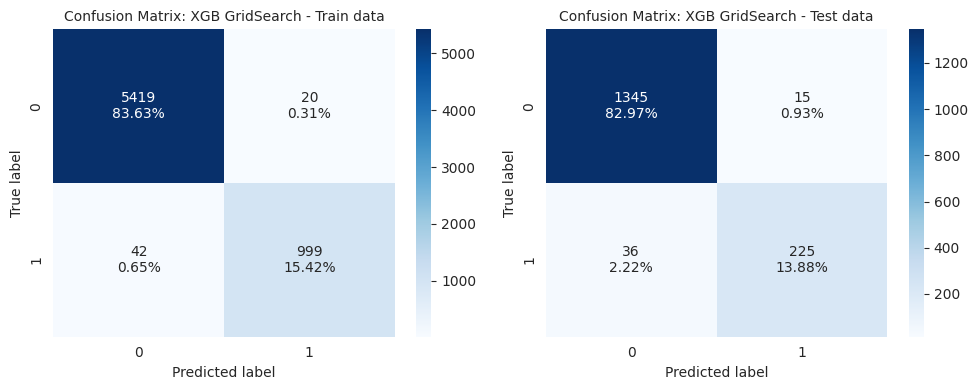

In [116]:
# compare the confusion matrix
confusion_matrix_sklearn(xgb_tuned_model, X_train, y_train, X_val, y_val, title='XGB GridSearch')

In [117]:
# analyze the metrics
xgb_gs_metrics = model_performance_classification_sklearn(xgb_tuned_model, X_train, y_train, X_val, y_val )
xgb_gs_metrics

,Train Accuracy,Validation Accuracy,Train Recall,Validation Recall,Train Precision,Validation Precision,Train F1,Validation F1
0,0.99,0.97,0.96,0.86,0.98,0.94,0.97,0.90


#### XGB - RandomizedSearchCV

In [118]:
%%time

# Call the Randomized Search CV
xgb_rds_cv = RandomizedSearchCV(xgb_model,  param_distributions = xgb_params, scoring=scorer, n_iter=50, n_jobs=-1, cv=5, random_state=42)

# Fit the Grid Search
xgb_rds_cv.fit(X_train, y_train)

# print the best params
print(f"XGB Random Search CV : Best params : {xgb_rds_cv.best_params_}")
print(f"XGB Random Search CV : Best score : {xgb_rds_cv.best_score_}")
print("-"*100)

XGB Random Search CV : Best params : {'subsample': 0.5, 'n_estimators': np.int64(60), 'learning_rate': 0.2, 'gamma': 0, 'colsample_bytree': 0.7, 'colsample_bylevel': 0.9}
XGB Random Search CV : Best score : 0.8654904306220097
----------------------------------------------------------------------------------------------------
CPU times: user 770 ms, sys: 58.9 ms, total: 829 ms
Wall time: 30.7 s


In [119]:
# Set the model to the best combination of parameters
xgb_tuned2_model = xgb_rds_cv.best_estimator_

# Fit the best algorithm to the data.
xgb_tuned2_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=0.9, colsample_bynode=None,
              colsample_bytree=0.7, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=0, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.2, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None,
              n_estimators=np.int64(60), n_jobs=None, num_parallel_tree=None,
              random_state=42, ...)

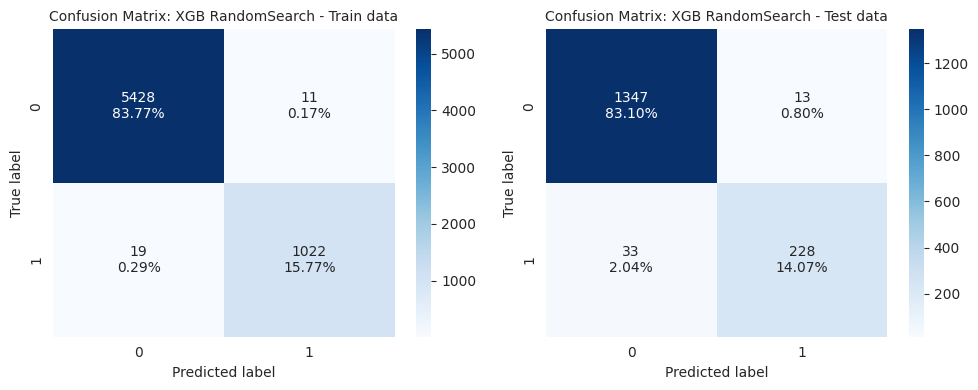

In [120]:
# compare the confusion matrix
confusion_matrix_sklearn(xgb_tuned2_model, X_train, y_train, X_val, y_val, title='XGB RandomSearch')

In [121]:
# analyze the metrics
xgb_rds_metrics = model_performance_classification_sklearn(xgb_tuned2_model, X_train, y_train, X_val, y_val )
xgb_rds_metrics

,Train Accuracy,Validation Accuracy,Train Recall,Validation Recall,Train Precision,Validation Precision,Train F1,Validation F1
0,1.00,0.97,0.98,0.87,0.99,0.95,0.99,0.91


### Random Forest - Tuning

Lets tune the Random forest for the below parameters

The important hyperparameters available for random forest classifier are:

* n_estimators: The number of trees in the forest, default = 100.

* max_features: The number of features to consider when looking for the best split.

* class_weight: Weights associated with classes in the form {class_label: weight}.If not given, all classes are supposed to have weight one.

* bootstrap: Whether bootstrap samples are used when building trees. If False, the entire dataset is used to build each tree, default=True.

* max_samples: If bootstrap is True, then the number of samples to draw from X to train each base estimator. If None (default), then draw N samples, where N is the number of observations in the train data.

* oob_score: Whether to use out-of-bag samples to estimate the generalization accuracy, default=False.

In [122]:
# Initialize the model
rdf_model = RandomForestClassifier(random_state=42)

rdf_params = {
    "n_estimators": np.arange(50,110,10),
    "min_samples_leaf": [6,7,8],
    "max_features": [0.5, 0.7],
    "max_samples": [0.5, 0.7],
}

#### Random Forest - Grid Search

In [123]:
%%time

# call the Grid search CV
rdf_gs_cv = GridSearchCV(estimator = rdf_model, param_grid = rdf_params, scoring = scorer, cv = 5, n_jobs=-1)
rdf_gs_cv.fit(X_train, y_train)

# print the best params
print(f"Random Forest Grid Search CV : Best params : {rdf_gs_cv.best_params_}")
print(f"Random Foresr Grid Search CV : Best score : {rdf_gs_cv.best_score_}")
print("-"*100)

Random Forest Grid Search CV : Best params : {'max_features': 0.7, 'max_samples': 0.7, 'min_samples_leaf': 7, 'n_estimators': np.int64(90)}
Random Foresr Grid Search CV : Best score : 0.8184164519690835
----------------------------------------------------------------------------------------------------
CPU times: user 3.72 s, sys: 342 ms, total: 4.07 s
Wall time: 4min 35s


In [124]:
# Set the model to the best combination of parameters
rdf_tuned_model = rdf_gs_cv.best_estimator_

# Fit the best algorithm to the data.
rdf_tuned_model.fit(X_train, y_train)

RandomForestClassifier(max_features=0.7, max_samples=0.7, min_samples_leaf=7,
                       n_estimators=np.int64(90), random_state=42)

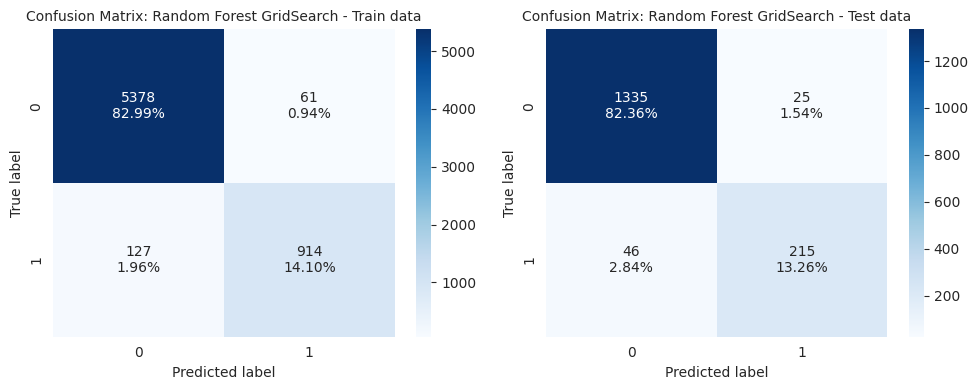

In [125]:
# compare the confusion matrix
confusion_matrix_sklearn(rdf_tuned_model, X_train, y_train, X_val, y_val, title='Random Forest GridSearch')

In [126]:
# analyze the metrics
rdf_gs_metrics = model_performance_classification_sklearn(rdf_tuned_model, X_train, y_train, X_val, y_val )
rdf_gs_metrics

,Train Accuracy,Validation Accuracy,Train Recall,Validation Recall,Train Precision,Validation Precision,Train F1,Validation F1
0,0.97,0.96,0.88,0.82,0.94,0.90,0.91,0.86


**Observations**:

* The Random Forest model tuned with Grid Search is generalizing well, showing consistent results across training and validation sets.

* However, its recall rate is slightly lower compared to the XGBoost-based models

#### Random Forest - Random Search

In [127]:
%%time

# Call the Randomized Search CV
rdf_rds_cv = RandomizedSearchCV(rdf_model,  param_distributions = rdf_params, scoring=scorer, n_iter=50, n_jobs=-1, cv=5, random_state=42)

# Fit the Grid Search
rdf_rds_cv.fit(X_train, y_train)

# print the best params
print(f"Random Forest Random Search CV : Best params : {rdf_rds_cv.best_params_}")
print(f"Random Forest Random Search CV : Best score : {rdf_rds_cv.best_score_}")
print("-"*100)

Random Forest Random Search CV : Best params : {'n_estimators': np.int64(90), 'min_samples_leaf': 7, 'max_samples': 0.7, 'max_features': 0.7}
Random Forest Random Search CV : Best score : 0.8184164519690835
----------------------------------------------------------------------------------------------------
CPU times: user 3.07 s, sys: 253 ms, total: 3.32 s
Wall time: 3min 13s


In [128]:
# Set the model to the best combination of parameters
rdf_tuned2_model = rdf_rds_cv.best_estimator_

# Fit the best algorithm to the data.
rdf_tuned2_model.fit(X_train, y_train)

RandomForestClassifier(max_features=0.7, max_samples=0.7, min_samples_leaf=7,
                       n_estimators=np.int64(90), random_state=42)

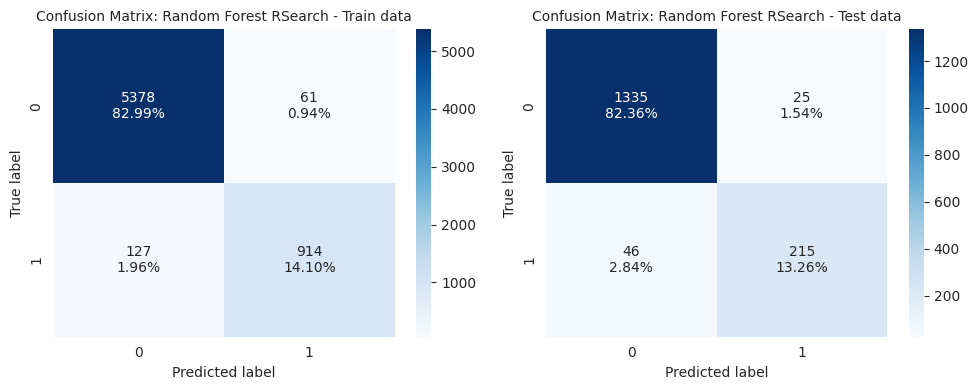

In [129]:
# compare the confusion matrix
confusion_matrix_sklearn(rdf_tuned2_model, X_train, y_train, X_val, y_val, title='Random Forest RSearch')

**Observations**:

* The results are consistent between the training and validation datasets, indicating that the model is stable and generalizes well to unseen data

In [130]:
# analyze the metrics
rdf_rds_metrics = model_performance_classification_sklearn(rdf_tuned2_model, X_train, y_train, X_val, y_val )
rdf_rds_metrics

,Train Accuracy,Validation Accuracy,Train Recall,Validation Recall,Train Precision,Validation Precision,Train F1,Validation F1
0,0.97,0.96,0.88,0.82,0.94,0.90,0.91,0.86


**Observations**:

* The Random Forest model tuned with Randomized Search is giving similar results as Random Forest with Grid Search.

* Its recall rate is slightly lower compared to the XGBoost-based models

In [131]:
# lets compare the metrics for tuned models
tuned_models = [
    ('Adaboost GridSearch', adb_tuned_model),
    ('Adaboost RandomSearch', adb_tuned2_model),
    ('GBM GridSearch', gbm_tuned_model),
    ('GBM RandomSearch', gbm_tuned2_model),
    ('XGB GridSearch', xgb_tuned_model),
    ('XGB RandomSearch', xgb_tuned2_model),
    ('Random Forest GSearch', rdf_tuned_model),
    ('Random Forest RSearch', rdf_tuned2_model)
]


concat_model_metrics(tuned_models, X_train, y_train)

,Model,Train Accuracy,Validation Accuracy,Train Recall,Validation Recall,Train Precision,Validation Precision,Train F1,Validation F1
0,Adaboost GridSearch,0.99,0.97,0.96,0.88,0.98,0.92,0.97,0.90
1,Adaboost RandomSearch,0.98,0.96,0.94,0.87,0.97,0.90,0.95,0.89
2,GBM GridSearch,0.98,0.96,0.93,0.85,0.97,0.91,0.95,0.88
3,GBM RandomSearch,0.98,0.96,0.93,0.85,0.97,0.91,0.95,0.88
4,XGB GridSearch,0.99,0.97,0.96,0.86,0.98,0.94,0.97,0.90
5,XGB RandomSearch,1.00,0.97,0.98,0.87,0.99,0.95,0.99,0.91
6,Random Forest GSearch,0.97,0.96,0.88,0.82,0.94,0.90,0.91,0.86
7,Random Forest RSearch,0.97,0.96,0.88,0.82,0.94,0.90,0.91,0.86


**Observations**:

* XGBoost with Random Search is the top-performing model, followed closely by XGBoost with Grid Search.

* GBM models serve as strong alternatives, offering competitive performance across key metrics.

## Models comparision and Selection

In [132]:
# lets compare all models
all_models = tuned_models + models_us + models_os + models

concat_model_metrics(all_models, X_train, y_train, test=False).sort_values(by=['Validation Recall', 'Validation Precision'], ascending=[False,False])

,Model,Train Accuracy,Validation Accuracy,Train Recall,Validation Recall,Train Precision,Validation Precision,Train F1,Validation F1
13,Xgboost under,0.96,0.95,1.00,0.96,0.81,0.76,0.89,0.85
12,GBM under,0.95,0.93,0.98,0.95,0.76,0.72,0.86,0.82
11,Adaboost under,0.92,0.92,0.95,0.94,0.67,0.68,0.78,0.79
10,Random Forest under,0.95,0.93,1.00,0.94,0.78,0.72,0.87,0.82
9,Bagging under,0.95,0.92,1.00,0.92,0.77,0.69,0.87,0.79
25,Xgboost,1.00,0.97,1.00,0.89,1.00,0.94,1.00,0.91
8,Dtree under,0.93,0.88,1.00,0.88,0.70,0.59,0.83,0.71
19,Xgboost over,1.00,0.97,1.00,0.88,1.00,0.93,1.00,0.90
0,Adaboost GridSearch,0.99,0.97,0.96,0.88,0.98,0.92,0.97,0.90
5,XGB RandomSearch,1.00,0.97,0.98,0.87,0.99,0.95,0.99,0.91


**Observations**:

* The undersampling models yield a higher recall rate, but perform poorly on other metrics, indicating limited overall effectiveness.

* XGBoost with default settings and oversampling deliver a balanced performance with strong recall and good overall metrics.

* XGBoost tuned using Random Search also achieves a high recall rate along with strong performance across other key metrics. XGB tuned with Grid Search is also yielding closer results.

* GBM models serve as strong alternatives to XGBoost, offering good generalization. However, they typically have a slightly lower recall rate compared to XGBoost models.

Among all the top-performing models, XGB models tuning demonstrates good recall rate and generalization between training and validation datasets.

Therefore, XGB with Random Search tuning is selected as the final model.

### pipeline the final model

The following steps are performed in the pipeline

1. Treat Missing values
2. One hot encoding
3. Model building using XGB best params

In [133]:
# initialize the model with XGB Randomized Search CV best params
xgb_model_final = XGBClassifier(random_state=42, colsample_bylevel=0.7, colsample_bytree=0.9, eval_metric='logloss',
              gamma=1, learning_rate=0.2, n_estimators=np.int64(90))
xgb_model_final

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=0.7, colsample_bynode=None,
              colsample_bytree=0.9, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=1, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.2, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None,
              n_estimators=np.int64(90), n_jobs=None, num_parallel_tree=None,
              random_state=42, ...)

In [134]:
# create pipeline for categorical fields : impute missing and onehot encoding
cat_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("onehot", OneHotEncoder(handle_unknown="ignore"))
])

In [135]:
# create pipeline for numerical fields : impute missing if any
num_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),
])

In [136]:
# create preprocessor using ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ("num", num_transformer, num_fields),
        ("cat", cat_transformer, cat_fields),
    ],
    remainder="passthrough",
)

In [137]:
# create model pipeline
model_pipeline = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("model", xgb_model_final)
])

In [138]:
# confirm that the data set has null values and the categorical columns are not one hot encoded
X_train_bk.isnull().sum()

,0
Gender,0
Dependent_count,0
Education_Level,973
Marital_Status,486
Income_Category,706
Card_Category,0
Months_on_book,0
Total_Relationship_Count,0
Months_Inactive_12_mon,0
Contacts_Count_12_mon,0


In [139]:
# Fit the model on the training data
model_pipeline.fit(X_train_bk, y_train_bk)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median'))]),
                                                  ['Dependent_count',
                                                   'Months_on_book',
                                                   'Total_Relationship_Count',
                                                   'Months_Inactive_12_mon',
                                                   'Contacts_Count_12_mon',
                                                   'Credit_Limit',
                                                   'Total_Revolving_Bal',
                                                   'Avg_Open_To_Buy',
                                                   'Total_Amt_Chng_Q4_Q1',
                                                   'T...
                               feature_types=None, gamma=1, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=0.2,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=np.int64(90), n_jobs=None,
                               num_parallel_tree=None, random_state=42, ...))])

In [144]:
# print cross validation scores
analyze_cross_validation_scores([("XGB Final", xgb_model_final)], X_train, y_train, X_val, y_val)

Cross Validation performance on Train data
XGB Final: 0.8597534044902467 : [0.85576923 0.85576923 0.80769231 0.92307692 0.85645933]
----------------------------------------------------------------------------------------------------
Performance on Validation data
XGB Final: 0.8773946360153256
----------------------------------------------------------------------------------------------------


([array([0.85576923, 0.85576923, 0.80769231, 0.92307692, 0.85645933])],
 ['XGB Final'])

In [141]:
# compare the metrics on validation data
model_performance_classification_sklearn(xgb_model_final, X_train, y_train, X_val, y_val )

,Train Accuracy,Validation Accuracy,Train Recall,Validation Recall,Train Precision,Validation Precision,Train F1,Validation F1
0,0.99,0.97,0.97,0.88,0.98,0.93,0.97,0.91


**Observations**:
* The validation metrics are strong, indicating that the model is generalizing well to unseen data.

* While the validation metric is slightly lower compared to training, it remains robust and reliable

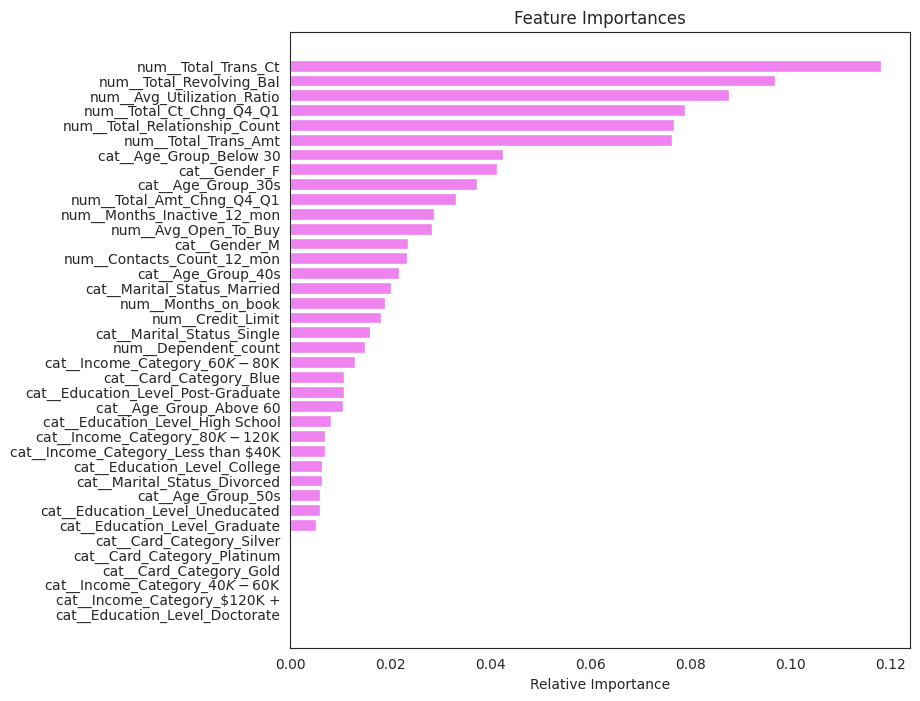

In [142]:
# plot important features
plot_important_features(xgb_model_final, X_train)

**Observations**

The top important features are

    1. Total Transactions count
    2. Total Revolving Balance
    3. Avg Utilization Ratio
    4. Total count change Q4_Q1
    5. Total Relationships count
    6. Total Transaction amount
   

In [145]:
# compare the metrics on test data
model_performance_classification_sklearn(xgb_model_final, X_train, y_train, X_test, y_test, test=True)

,Train Accuracy,Test Accuracy,Train Recall,Test Recall,Train Precision,Test Precision,Train F1,Test F1
0,0.99,0.97,0.97,0.90,0.98,0.92,0.97,0.91


**Observations**:

* Model is generalizing well. All test metrics are strong.
* Recall is slightly lower on the test set, but still quite good.
* There’s minimal overfitting, but worth monitoring closely because perfect train accuracy can sometimes indicate overfitting

## Actionable insights


* Customers with fewer transactions counts are more likely to churn.

* Customers with lower transaction amounts are more likely to stop the credit card usage.

* Older customers tend to have longer relationships with the bank.

* Low contacts with bank could imply detachment from the service.

* Customers with a higher utilization ratio are more likely to continue using their credit cards.

* Customers with higher relationship counts with the bank tend to discontinue credit card usage.

* The attrition rate is observed to be higher among female customers.


## Recommendations

* The relatively important features are
    1. Total Transactions count
    2. Total Revolving Balance
    3. Total Relationships count
    4. Total Transaction amount
    5. Total count change Q4_Q1
    6. Avg Utilization Ratio

* It is recommended to further tune and regularize the models by exploring a wider hyperparameter space, as the currently selected model shows slight overfitting.

* Efforts should focus on improving the customer churn prediction model by implementing a closed-loop system and incorporating more diverse data sources.

* Conducting exit interviews can provide valuable insights, and this feedback data should be integrated into the prediction model.

* Churned should be targeted with personalized rewards, discounts, or loyalty offers to improve retention.

* Implementing a timely and precise communication strategy is essential to maintain customer engagement and reduce attrition.